<a href="https://colab.research.google.com/github/Sid-9823/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <u>**Project Title : Bike Sharing Demand Prediction**</u>
#####**Project Type** - Regression

#####**Contribution** - Individual

#####**Individual name** - Siddhant Pal

#####**Cohort** - Berlin

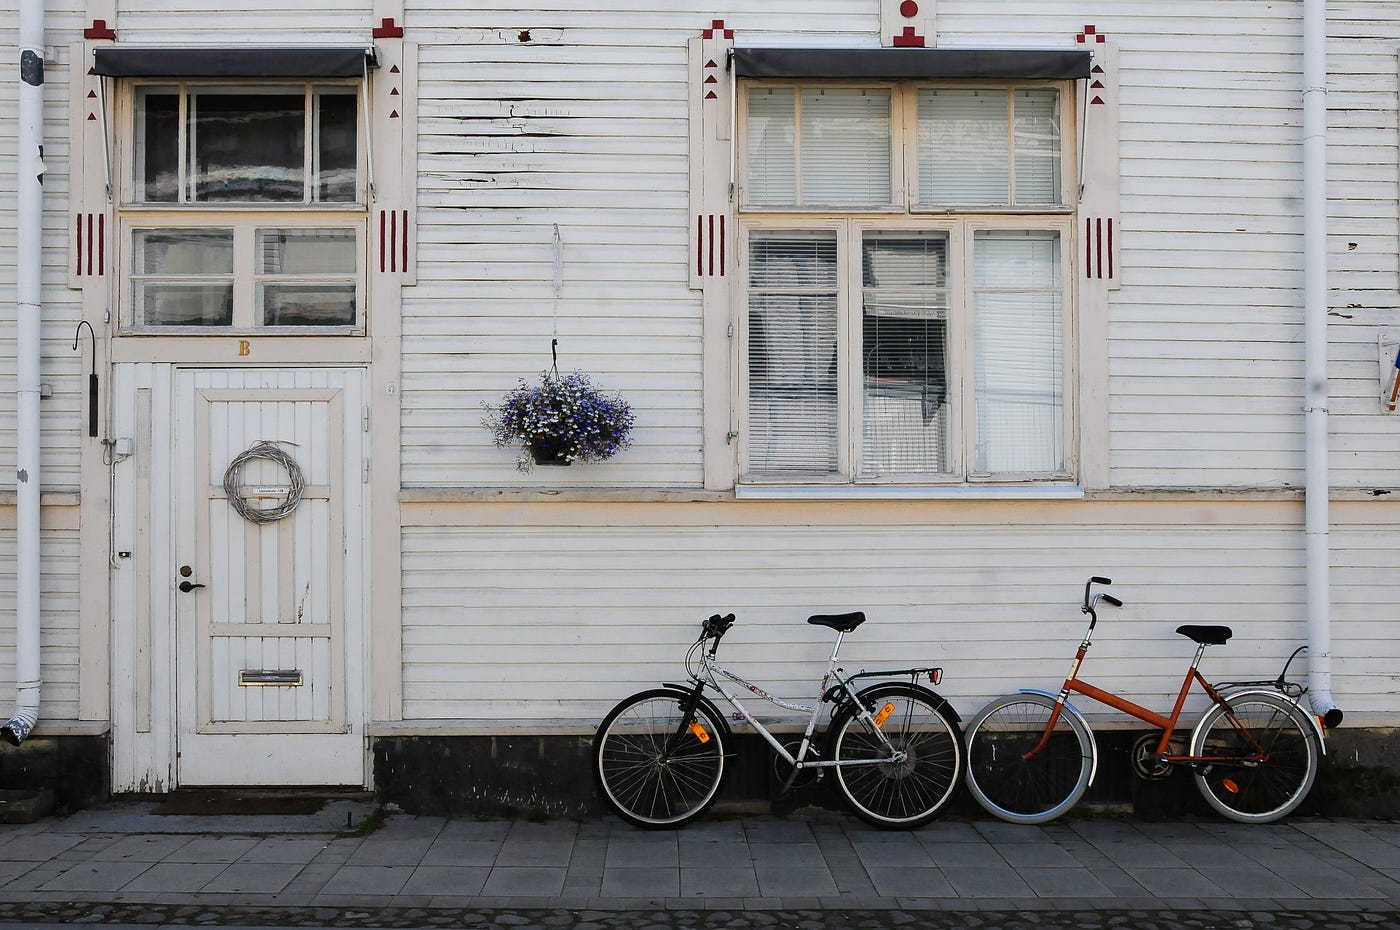

#**Project Summary**


Bikes have grown in popularity as a practical and environmentally friendly alternative to traditional modes of transportation in metropolitan areas. However, one of the most difficult issues in implementing rental bike programmes is ensuring a constant supply of bikes. To overcome this issue, it is critical to precisely forecast the number of bikes needed at various times of the day.

In the beginning, we imported the required libraries that were necessary to perform operations, and then we performed basic operations such as mounting the drive,loading the dataset (there are a total of 8760 columns and 14 rows in this dataset), and storing it in a dataframe. Performed basic analysis like checking dimensions, finding null values, and a bit of data wrangling in which we performed some feature engineering on the 'Date' column and divided it into several others to get deeper insights.

Further on, we did some EDA on our dataset, performed univariate and bivariate analysis on our dataset separately to derive in-depth insights, and plotted the distribution of each feature. We checked correlation and treated multicollinearity with the help of heatmap correlation.

We create three hypothetical assertions and do hypothesis testing based on our visualisations. The statements are as follows:

*   At any given time, the average number of bikes in Seoul is more than 100.

*   At every location in Seoul, the average temperature is greater than 10
    degrees Celsius.
*   The standard deviation of humidity in Seoul is 20.

In our feature engineering part, we handled outliers by the square root transformation method and treated moderate right skewness of the dataset. With the help of one hot encoding technique, we converted our categorical features into numerical features.

For the model implementation part, we divided our dataset into an 80:20 training:testing split. We then utilised six machine learning algorithms: linear regression, lasso, ridge, decision tree, random forest, and gradient boosting. We used hypertuning to increase the performance of our model and put the results in a data frame so we could compare them later. The best r2 scores we got were with gradient boosting and random forest models: overall 92% for gradient boosting and 91% for random forest.

So in the end, the bike rental firm can deploy a model that either uses one of the above-mentioned models to maintain a stable supply of rental bikes or reduce wait times for users.


#**GitHub Link**

https://github.com/Sid-9823/Bike-Sharing-Demand-Prediction.git

#**Problem statement**

**BUSINESS PROBLEM OVERVIEW**

Rental bikes have become an increasingly popular mode of transportation in urban areas, as they provide a convenient and eco-friendly alternative to traditional means of getting around. However, one of the key challenges in implementing rental bike schemes is ensuring a stable supply of bikes at all times. In order to address this issue, it is crucial to accurately predict the number of bikes required at different hours of the day.

In this project, I am using various machine learning regression models to analyze various factors that impact bike usage, such as temperature, season, rainfall, holidays, the number of rented bikes at different times of the day, etc. By taking these factors into account, it becomes possible to forecast demand and allocate resources accordingly, ensuring a steady supply of rental bikes and reducing wait times for users.

### **Data Description**

**The dataset contains weather information such as (Temperature, Windspeed, Humidity, Visibility, Dew point, Solar Radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

**Feature's Information :**
* ***Date*** : *The date of the day during 365 days from 1/12/2017 to 30/11/2018 formatting in DD/MM/YYYY, type : str, we need to convert it into datetime format.*

* ***Rented Bike Count*** : *Count of bikes rented at each hour and it is our target variable, type : int*
* ***Hour*** : *The hour of the day starting from 0-23, type : int, we need to convert it into category data types.*
* ***Temperature*** : *Temperature in Celsius, type : Float.*
* ***Humidity*** : *Humidity in the air in %, type : int*
* ***Windspeed*** : *Speed of the wind in m/s, type : Float*
* ***Visibility(10m)*** : *Visibility in m, type : int*
* ***Dew point temperature*** : *Temperature at the beginning of the day in celsius, type : int*
* ***Solar Radiation(MJ/m2)*** : *Sun contribution, type : Float*
* ***Rainfall(mm)*** : *Amount of raining in mm, type : float*
* ***Snowfall(cm)*** : *Amount of snowing in cm, type : float*
* ***Seasons*** : *Season of the year, type : str (Four types of season's present in data)*
* ***Holiday*** : *If the day is Holiday or not, type : str*
* ***Functional Day*** : *If the day is a Functioning Day or not, type : str*






#**Importing necessary libraries**

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from datetime import datetime as dt

!pip install shap
import shap
import graphviz
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.9 MB/s eta 0:00:00


# **Data collection and analysis**

In [18]:
# Loading the data from csv file to a pandas dataframe.

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv')

In [19]:
# Printing first 5 rows.

df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  1/12/2017                254     0             -5.2           37   
1  1/12/2017                204     1             -5.5           38   
2  1/12/2017                173     2             -6.0           39   
3  1/12/2017                107     3             -6.2           40   
4  1/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [20]:
 # Printing last 5 rows.

df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [21]:
# Checking the number of rows and columns in our dataset.

df.shape

(8760, 14)

In [22]:
# Gathering information about our dataset such as null count values and data types involved.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [23]:
#  Getting the statistical measure of the dataframe.

df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

##**Data wrangling**

### **Changing column's names**

* ***Changing column's names as per our convenience as they are large and consist units in them in dataset.***

In [24]:
df = df.rename(columns={'Date':'date','Rented Bike Count':'rbc','Hour':'hour','Temperature(°C)':'temp','Humidity(%)':'hum',
                        'Wind speed (m/s)':'wind','Visibility (10m)':'visib','Dew point temperature(°C)':'dpt',
                        'Solar Radiation (MJ/m2)':'rad','Rainfall(mm)':'rain','Snowfall (cm)':'snow'})

* ***Splitting and converting 'Date' column from the dataframe into three other column's and changing it's data type in the next step.***

### **Breaking Date column**

In [25]:
# Converting 'date' column from object dtype to datetime object for further analysis.

d = pd.to_datetime(df['date'])

In [26]:
# Further breaking 'date' column into 'month' and 'day' column.

df['month'] = d.dt.month
df['day'] = d.dt.day_name()

In [27]:
# Creating a new column 'weekend' and dropping unnecessary columns.

df['weekend'] = df['day'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)
df.drop(columns = ['date','day'],axis = 1,inplace = True)

* ***Here, we broke 'date' column into various other column's for better understanding of data and created a new column 'weekend' to dive into insights of bike rentals at weekend.***

* ***And in the last, we dropped 'day' and 'date' columns as the required data can be accessed through 'month' and 'weeknd' column.***

In [28]:
df.head()

rbc  hour  temp  hum  wind  visib   dpt  rad  rain  snow Seasons  \
0  254     0  -5.2   37   2.2   2000 -17.6  0.0   0.0   0.0  Winter   
1  204     1  -5.5   38   0.8   2000 -17.6  0.0   0.0   0.0  Winter   
2  173     2  -6.0   39   1.0   2000 -17.7  0.0   0.0   0.0  Winter   
3  107     3  -6.2   40   0.9   2000 -17.6  0.0   0.0   0.0  Winter   
4   78     4  -6.0   36   2.3   2000 -18.6  0.0   0.0   0.0  Winter   

      Holiday Functioning Day  month  weekend  
0  No Holiday             Yes      1        0  
1  No Holiday             Yes      1        0  
2  No Holiday             Yes      1        0  
3  No Holiday             Yes      1        0  
4  No Holiday             Yes      1        0

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rbc              8760 non-null   int64  
 1   hour             8760 non-null   int64  
 2   temp             8760 non-null   float64
 3   hum              8760 non-null   int64  
 4   wind             8760 non-null   float64
 5   visib            8760 non-null   int64  
 6   dpt              8760 non-null   float64
 7   rad              8760 non-null   float64
 8   rain             8760 non-null   float64
 9   snow             8760 non-null   float64
 10  Seasons          8760 non-null   object 
 11  Holiday          8760 non-null   object 
 12  Functioning Day  8760 non-null   object 
 13  month            8760 non-null   int64  
 14  weekend          8760 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 1.0+ MB


In [30]:
# Checking the value counts of weekend's.

df['weekend'].value_counts()

0    6216
1    2544
Name: weekend, dtype: int64

### **Converting data type**

* ***We are converting data types of 'month', 'weekend' and 'Hour' column from 'integer' to 'category' data type, as it'll help us to derive more accurate observation's and it'll also help us to avoid un-necessary possible correlations between these column's.***

In [31]:
df.nunique()

rbc                2166
hour                 24
temp                546
hum                  90
wind                 65
visib              1789
dpt                 556
rad                 345
rain                 61
snow                 51
Seasons               4
Holiday               2
Functioning Day       2
month                12
weekend               2
dtype: int64

In [32]:
# Changing the datatype from integer to category.

column = ['hour','month','weekend']

for a in column:
 df[a] = df[a].astype('category')

In [33]:
# As, we can see dtypes have changed to category.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   rbc              8760 non-null   int64   
 1   hour             8760 non-null   category
 2   temp             8760 non-null   float64 
 3   hum              8760 non-null   int64   
 4   wind             8760 non-null   float64 
 5   visib            8760 non-null   int64   
 6   dpt              8760 non-null   float64 
 7   rad              8760 non-null   float64 
 8   rain             8760 non-null   float64 
 9   snow             8760 non-null   float64 
 10  Seasons          8760 non-null   object  
 11  Holiday          8760 non-null   object  
 12  Functioning Day  8760 non-null   object  
 13  month            8760 non-null   category
 14  weekend          8760 non-null   category
dtypes: category(3), float64(6), int64(3), object(3)
memory usage: 848.3+ KB


# **Exploratory Data Analysis and Visualization**

**What is EDA ?**

***Exploratory Data Analysis can be considered as a process which is used to visualise data and it helps to uncover the underlying pattern and relations between the dependent and independent variable's which can be useful in decision making.***

## **Bivariate Analysis**

***A bivariate analysis is a type in which two variable's are taken into consideration and underlying relationship between the two is analysed.***

### **Analysis of Dependent variable vs. Categorical data type**

***Here, we are trying to find the underlying relationship's between dependent(Output) and independent variable's one by one. First, we will proceed with relationship's of dependent variable(Output) with categorical and object data type's then afterwards with numerical or integer data type's.***

####**Month**

Text(0.5, 1.0, 'Rented bike count per month over a year')

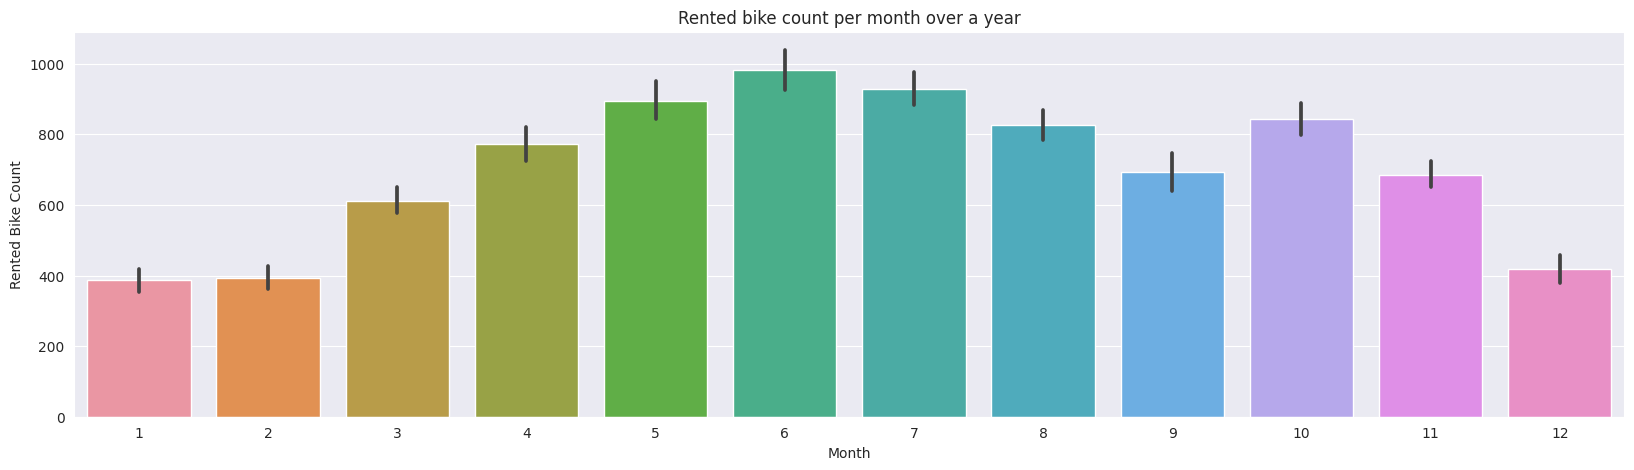

In [34]:
# Analysing in which months bike's were most rented.

plt.figure(figsize=(20,5))
sns.barplot(x='month',y='rbc',data=df)
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.title('Rented bike count per month over a year')

* ***As, we can see by the above plot that most bikes were rented in months from March to September basically in the season of Summer.***

####**Weekend**

Text(0.5, 1.0, 'Rented bike count on weekend and normal days')

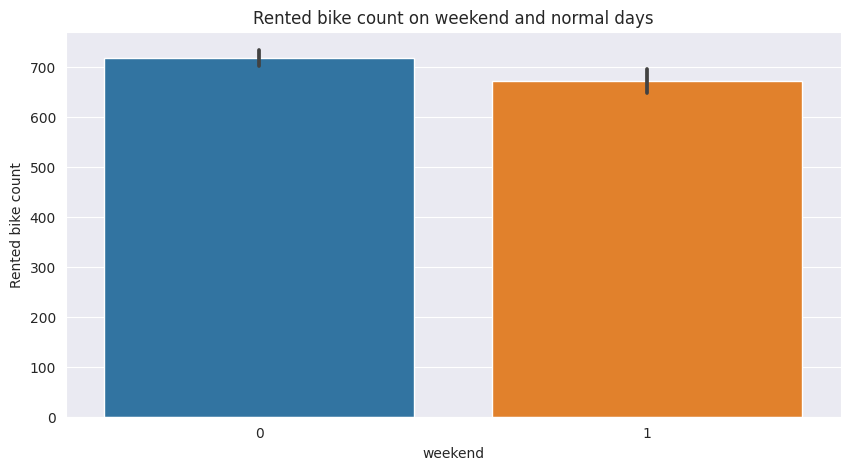

In [35]:
# Analysing with the help of a barplot that When bikes were most rented whether on weekdays or on weekend.

plt.figure(figsize=(10,5))
sns.barplot(x='weekend',y = 'rbc',data=df)
plt.ylabel('Rented bike count')
plt.title('Rented bike count on weekend and normal days')

* ***By the above plot, we can conclude that bikes were most rented on weekdays as compared to weekends even though there is not much difference in the count of both but still on weekday's bikes rental count was slightly higher as compared to rental on weekend.***

Text(0.5, 1.0, "Hour's during which bike's were most rented on weekday's and weekend's")

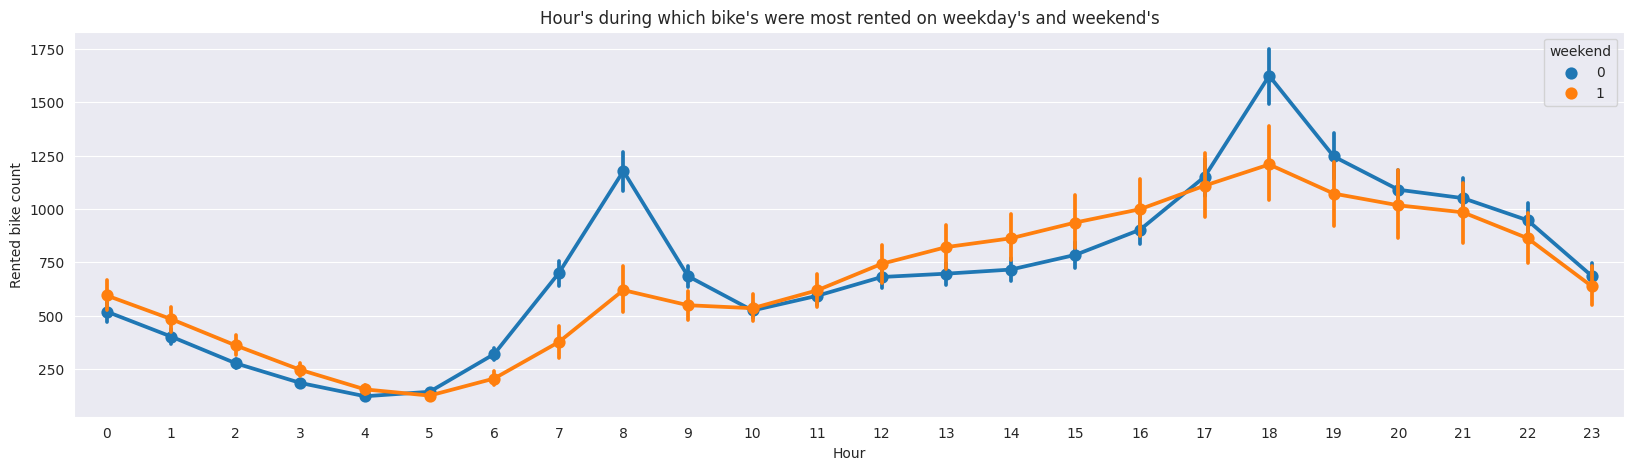

In [36]:
# Analysing with the help of a pointplot about those hour's in a day when the rental demand was high on weekend's and on weekday's.

plt.figure(figsize=(20,5))
sns.pointplot(x='hour',y='rbc',data=df,hue='weekend')
plt.xlabel('Hour')
plt.ylabel('Rented bike count')
plt.title("Hour's during which bike's were most rented on weekday's and weekend's")

* ***Orange line denotes weekend's whereas blue line denotes weekday's.***

* ***As, we can see with the help of the above plot that bike rentals were on peak during the early morning hours from 6 to 10 am which is basically the time of students and office goers and from 4 to 6 pm i.e when college students and office goers returns back to home.***

####**Hour**

Text(0.5, 1.0, "Number of bike's rented during differnt hour's of the day")

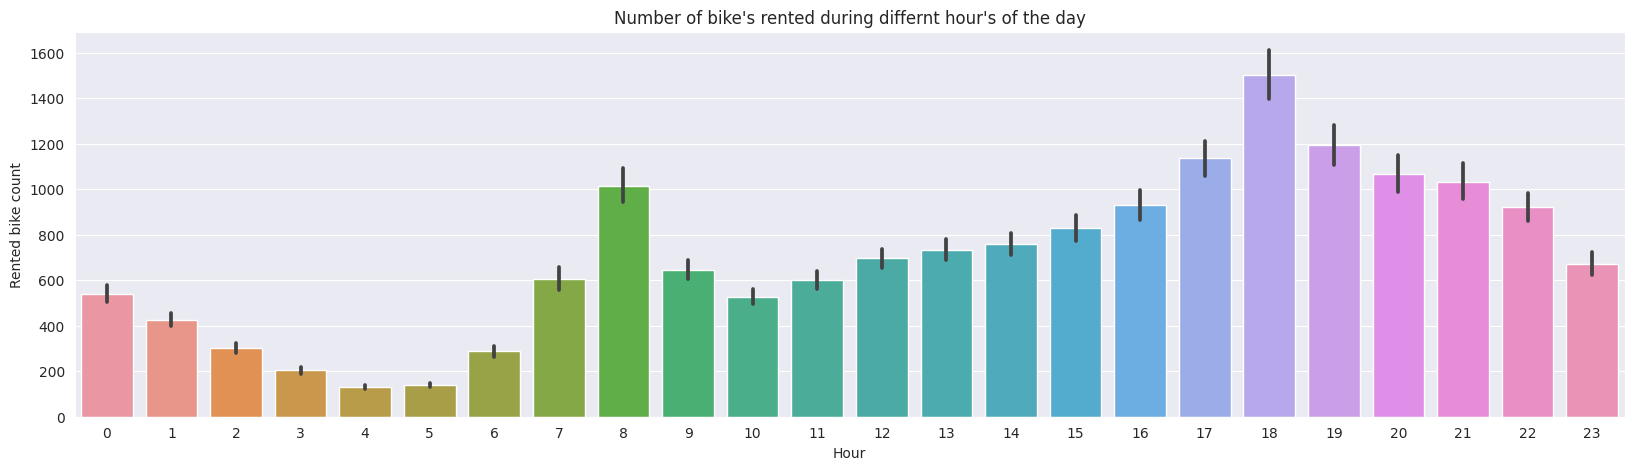

In [37]:
# Analysing the previous observation again with another type of plot to identify any underlying information.

plt.figure(figsize=(20,5))
sns.barplot(x='hour',y='rbc',data=df)
plt.xlabel('Hour')
plt.ylabel('Rented bike count')
plt.title("Number of bike's rented during differnt hour's of the day")

* ***We can conclude by the above graph that people use rental bikes more in morning's from 6 to 8 am and in evening's from 5 to 7 pm.***

####**Functioning day**

Text(0.5, 1.0, "Rented bike's count on functioning day's")

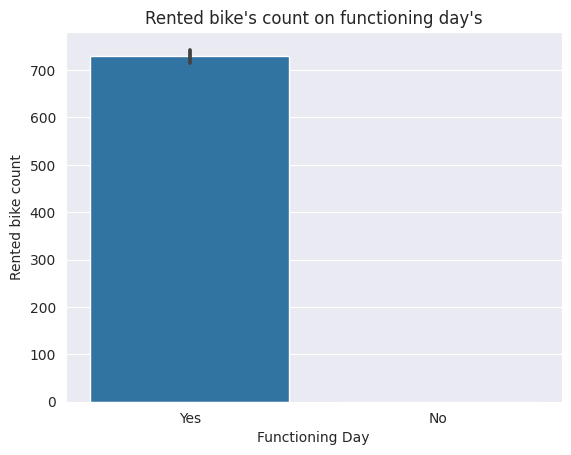

In [38]:
# Analysing bike rental demand on functioning day.

sns.barplot(x='Functioning Day',y='rbc',data=df)
plt.ylabel('Rented bike count')
plt.title("Rented bike's count on functioning day's")

* ***As, we can see by the above plot very clearly that bike rental service is used only on functioning days while there is close to 0 bike was rented on a non-functioning day.***

In [39]:
# Checking how many holidays and non-holidays are there in dataframe.

df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

####**Holiday**

Text(0.5, 1.0, "Number of bike's rented on holiday's and non-holiday's")

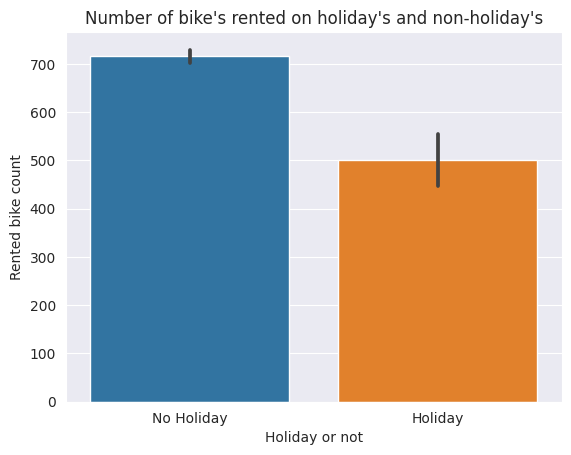

In [40]:
# Analysing bike rental demand on holidays and non - holidays.

sns.barplot(x='Holiday',y='rbc',data=df)
plt.xlabel('Holiday or not')
plt.ylabel('Rented bike count')
plt.title("Number of bike's rented on holiday's and non-holiday's")

* ***By the above observation, we can conclude that more bikes were rented on non - holidays as compared to rentals on holidays.***

In [41]:
# Checking how many holidays and non-holidays are there in dataframe.

df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, "Change in bike rental's on holiday's and non-holiday's")

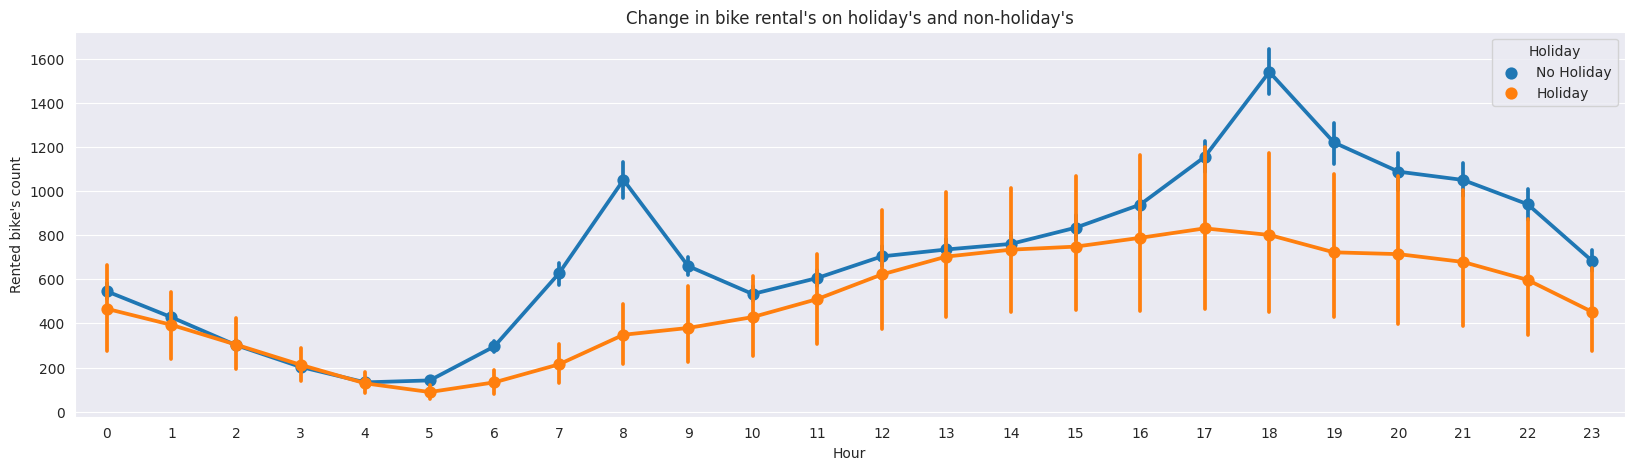

In [42]:
# A pointplot showing on which hours on holidays and on non-holidays most bikes were rented.

plt.figure(figsize=(20,5))
sns.pointplot(x='hour',y='rbc',data=df,hue='Holiday')
plt.xlabel('Hour')
plt.ylabel("Rented bike's count")
plt.title("Change in bike rental's on holiday's and non-holiday's")

* ***By the above observation, we can conclude that bikes were mostly rented on non-holidays on same timings shown by previous graphs but it is interesting that on holidays there is no such surge in rentals is seen.***

* ***On holiday's, bike rentals showing a gradual surge in demand as we can see from 7 am to to 5 pm afterwards it decreases slightly.***

####**Seasons**

#####**By observing the above chart, we can conclude following observations :-**

* ***SUMMER - Highest number of bikes rented out of all seasons.***

* ***AUTUMN - After, summer highest number of bikes were rented in autumn.***

* ***SPRING - In spring, slightly less number of bikes were rented as compared to autumn.***

* ***WINTER - Least number of bikes rented in winter out of all seasons.***

Text(0.5, 1.0, 'Number of bikes rented in different seasons of the year')

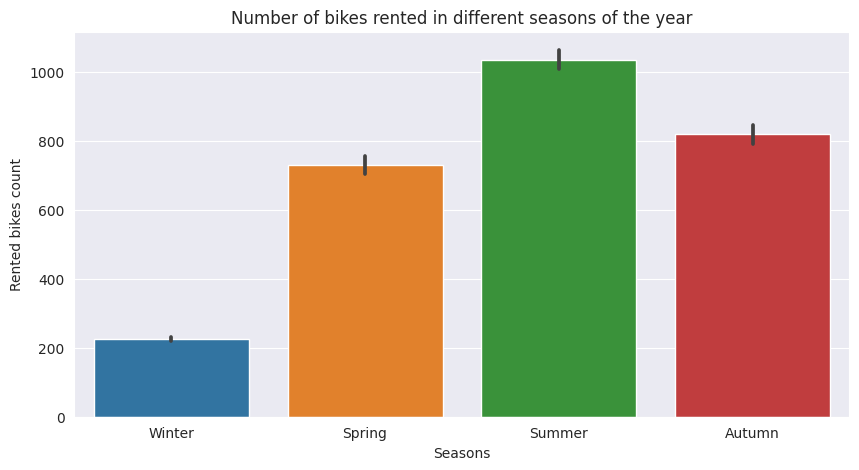

In [43]:
# Analysing number of bike rentals in different seasons.

plt.figure(figsize=(10,5))
sns.barplot(x='Seasons',y='rbc',data = df)
plt.ylabel('Rented bikes count')
plt.title('Number of bikes rented in different seasons of the year')

In [44]:
# Checking how many days are there in different seasons in dataframe.

df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

#####***By observing the above chart, we can conclude that :-***

* ***Peak times are almost same in nature for all seasons except throughout the year except winter i.e. 7 to 9 am and 4 to 6 pm.***

* ***In winter, Overall bikes rentals were less and and there was a slight surge observed in 7 to 8 am in mornings and 5 to 6 pm in evenings.***

Text(0.5, 1.0, 'Trend of bikes rental throughout the day over all seasons.')

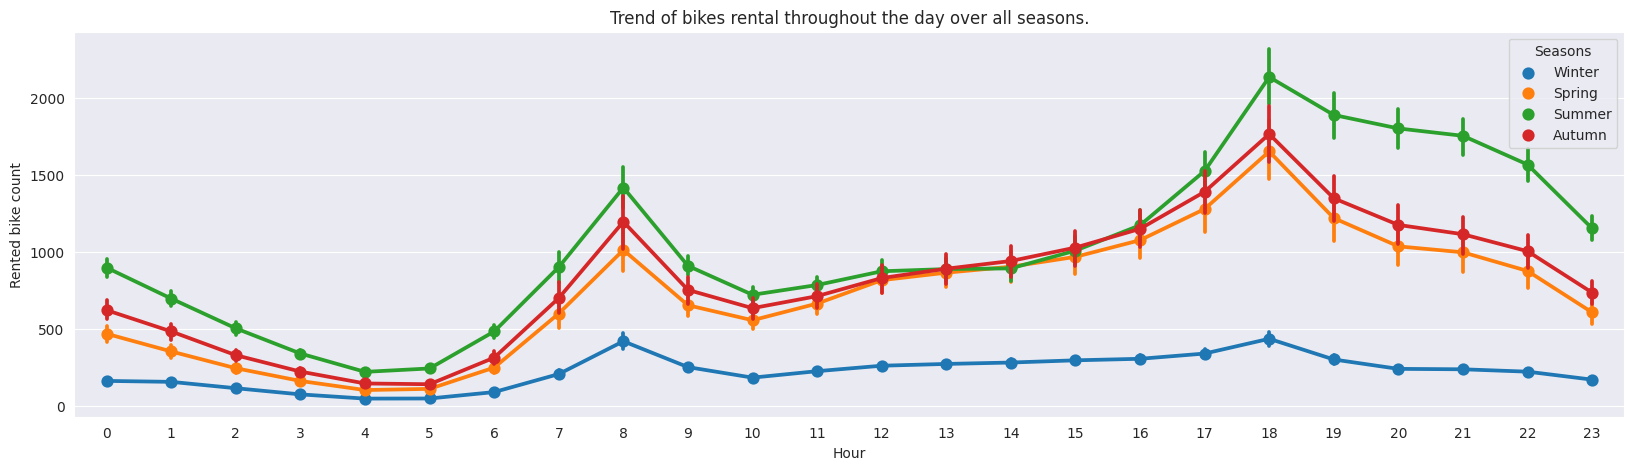

In [45]:
# Analysing the trend of bikes rental throughout the day over all seasons.

plt.figure(figsize=(20,5))
sns.pointplot(x='hour',y='rbc',data = df,hue = 'Seasons')
plt.xlabel('Hour')
plt.ylabel('Rented bike count')
plt.title('Trend of bikes rental throughout the day over all seasons.')

###**Analysis of Dependent variable vs. Numerical data type**

####**Temperature**

Text(0.5, 1.0, 'Relation between temperature and rental bikes')

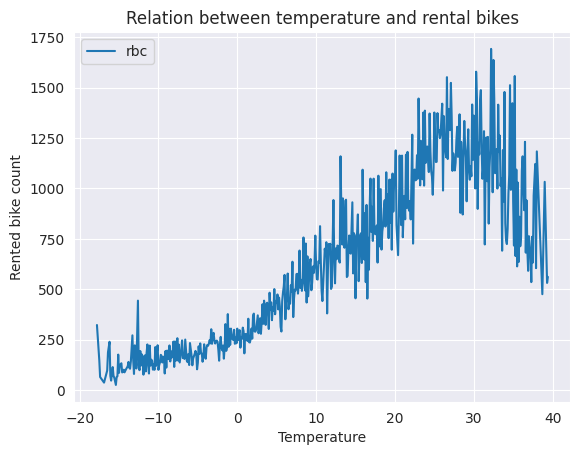

In [46]:
# Analysing the relation between temperature and rental bikes.

df.groupby('temp').agg({'rbc':'mean'}).plot()
plt.xlabel('Temperature')
plt.ylabel('Rented bike count')
plt.title('Relation between temperature and rental bikes')

* ***As, we can see by the above plot that bike rentals and high temperature are correlated i.e. users are renting more bikes in high temperature's.***

####**Humidity (%)**

Text(0, 0.5, 'Rented bike count')

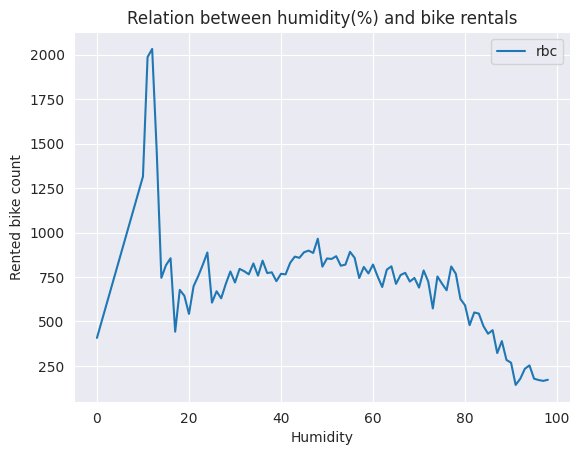

In [47]:
# Analysing relation between humidity and rental bikes count.

df.groupby('hum').agg({'rbc':'mean'}).plot()
plt.title('Relation between humidity(%) and bike rentals')
plt.xlabel('Humidity')
plt.ylabel('Rented bike count')

* ***It's obvious by the above plot that people tend to rent more bikes in less humid weather i.e. 5 - 10%.***

####**Wind speed (m/s)**

Text(0, 0.5, 'Rented bike count')

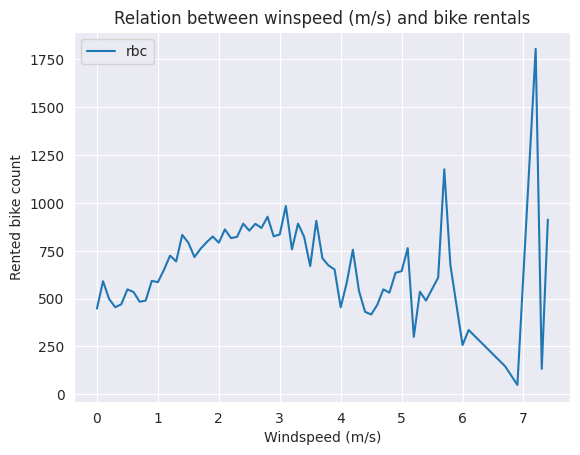

In [48]:
# Analysing the relation between wind speed and rental bikes.

df.groupby('wind').agg({'rbc':'mean'}).plot()
plt.title('Relation between winspeed (m/s) and bike rentals')
plt.xlabel('Windspeed (m/s)')
plt.ylabel('Rented bike count')

* ***By the above plot, we can conclude that people loves to ride bike's when it's windy outside.***

####**Dew point temperature (In celsius)**

Text(0, 0.5, 'Rented bike count')

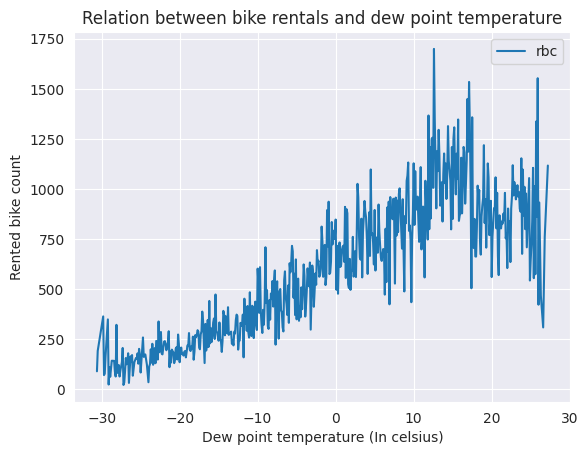

In [49]:
# Analysing the relation between dew point temperature and rental bikes.

df.groupby('dpt').agg({'rbc':'mean'}).plot()
plt.title('Relation between bike rentals and dew point temperature')
plt.xlabel('Dew point temperature (In celsius)')
plt.ylabel('Rented bike count')

* ***As, we can see by the above graph that bike rentals and dew point temperature are positively correlated i.e. people tends to rent more bikes in high dew point temperature.***

####**Rainfall (mm)**

Text(0.5, 1.0, 'Relation between rainfall and bike rentals')

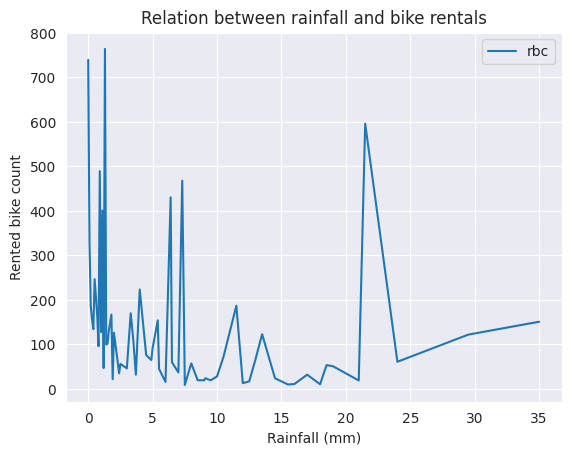

In [50]:
# Analysing the relation between rainfall and rental bikes.

df.groupby('rain').agg({'rbc':'mean'}).plot()
plt.xlabel('Rainfall (mm)')
plt.ylabel('Rented bike count')
plt.title('Relation between rainfall and bike rentals')

* ***As, we can see by the above data that people are renting bikes irrespective of the rainfall i.e. either high or low even if there is high rainfall i.e. 20 - 25 mm people are still renting high number of bikes.***

####**Snowfall (cm)**

Text(0, 0.5, 'Rented bike count')

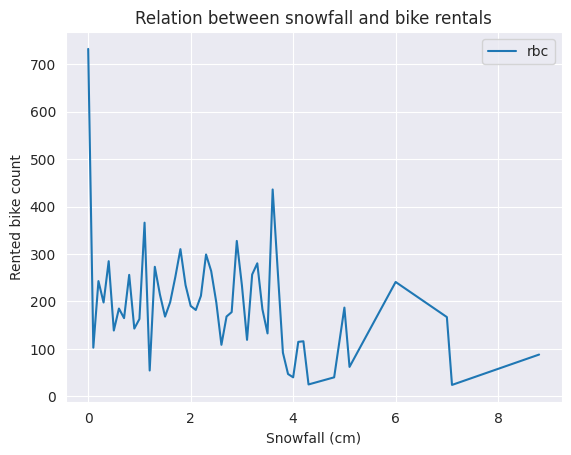

In [51]:
# Analysing the relation between snowfall and rental bikes.

df.groupby('snow').agg({'rbc':'mean'}).plot()
plt.title('Relation between snowfall and bike rentals')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented bike count')

* ***As we can conclude by the above graph that people are more likely to rent a bike when there is no snowfall as there is a high peak in demand where there was no snowfall and afterwards the demand could be seen decreasing with an increase in snowfall.***

### **Regression plot of Dependent variable vs. Numerical data type**

**What is a regression plot ?**

***we can define regression plot as a plot which depicts how one variable is linearly related to another variable with the help of a best fitted line through scattered data points in a plot during exploratory data analysis.***

####**Temperature**

Text(0, 0.5, 'Rented bike count')

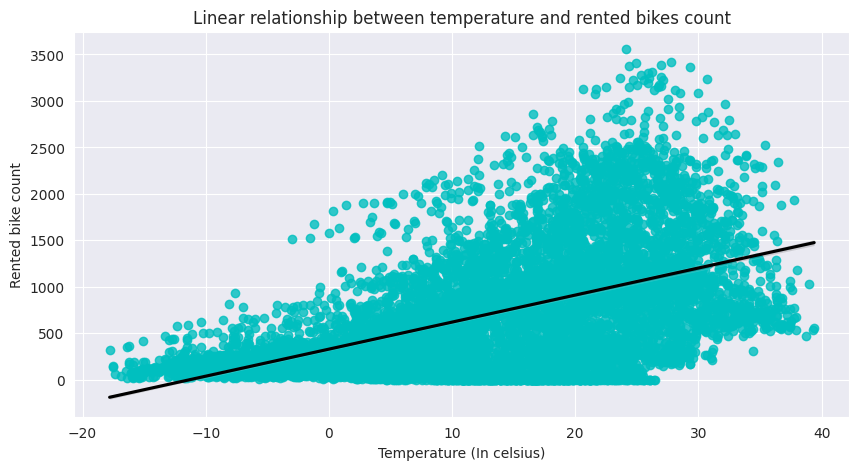

In [52]:
# Analyzing how the temperature is linearly related to rented bike count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['temp'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between temperature and rented bikes count')
plt.xlabel('Temperature (In celsius)')
plt.ylabel('Rented bike count')

* ***As we can clearly conclude by the above plot, temperature and bike rentals are positively correlated to each other.the higher the temperature, the higher the bike rentals.***

* ***The higher the temperature, the higher the bike rentals.***

####**Humidity (%)**

Text(0, 0.5, 'Rented bikes count')

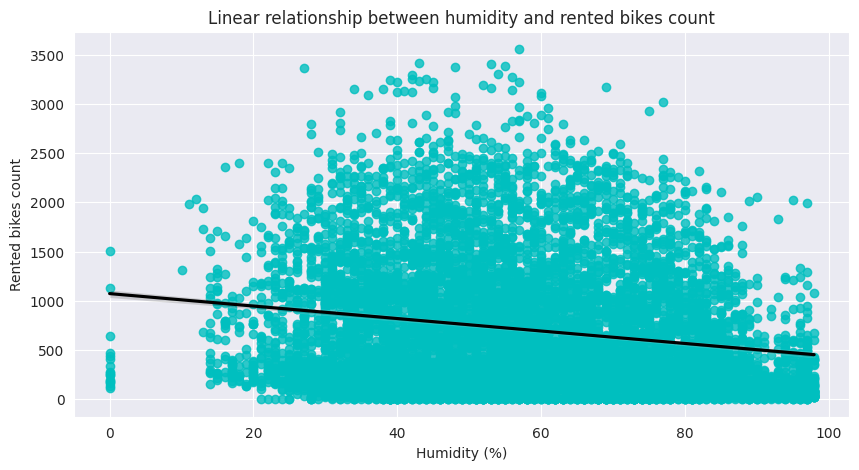

In [53]:
# Analyzing linear relationship between humidity and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['hum'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between humidity and rented bikes count')
plt.xlabel('Humidity (%)')
plt.ylabel('Rented bikes count')

* ***As we can conclude by the above plot, humidity and bike rentals are negatively related to each other.***

* ***The lower the humidity, the more bike rentals.***

####**Wind speed (m/s)**

Text(0, 0.5, 'Rented bikes count')

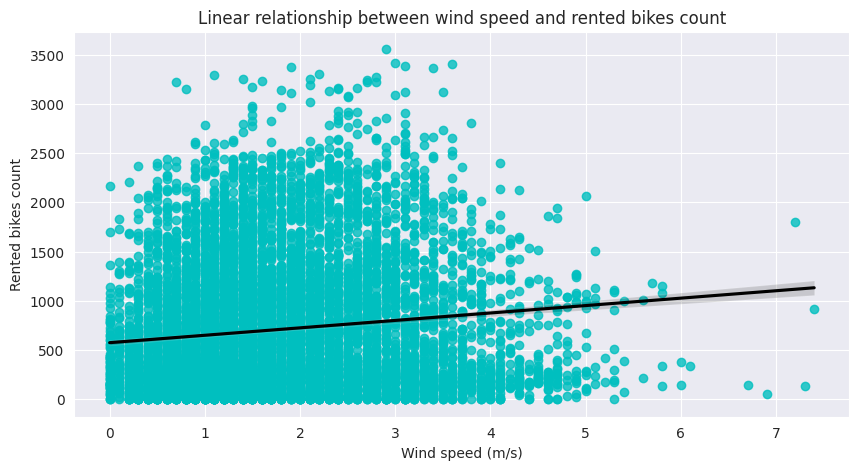

In [54]:
# Analyzing linear relationship between Wind speed and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['wind'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between wind speed and rented bikes count')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented bikes count')

* ***A positive relationship is seen between wind speed and rented bike counts.***

* ***The higher the wind speed, the higher the bike rentals.***

####**Visibility (10m)**

Text(0, 0.5, 'Rented bikes count')

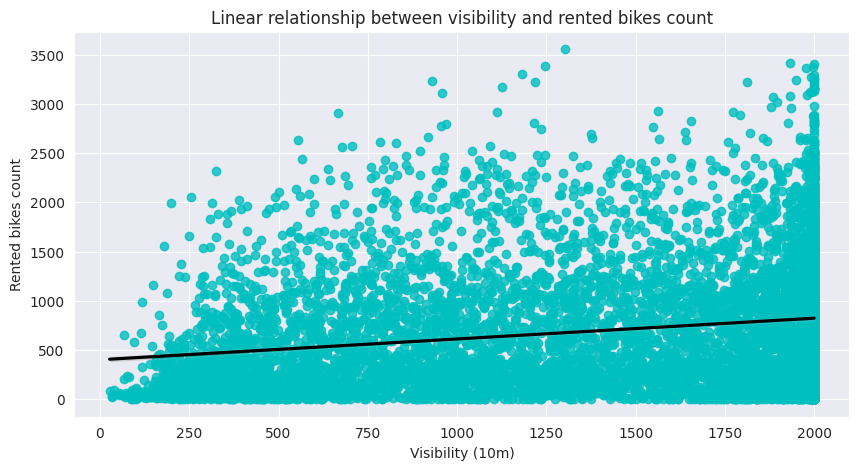

In [55]:
# Analyzing linear relationship between Visibility and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['visib'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between visibility and rented bikes count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented bikes count')

* ***A positive relationship is seen between visibility and rented bike counts.***

* ***The higher the visibility, the higher the bike rentals.***

####**Dew point temperature (In celsius)**

Text(0, 0.5, 'Rented bike count')

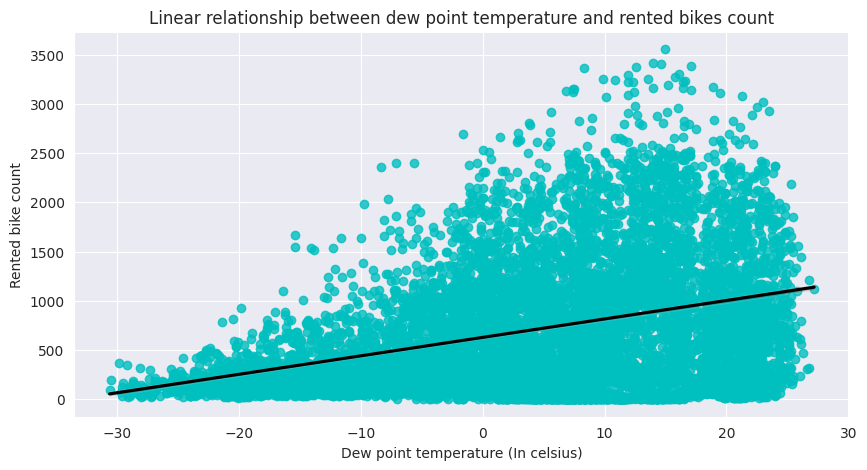

In [56]:
# Analyzing linear relationship between dew point temperature and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['dpt'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between dew point temperature and rented bikes count')
plt.xlabel('Dew point temperature (In celsius)')
plt.ylabel('Rented bike count')

* ***A positive relationship is seen between dew point temperature and rented bike counts.***

* ***The higher the dew point temperature, the higher the bike rentals.***

####**Solar Radiation**

Text(0, 0.5, 'Rented bike count')

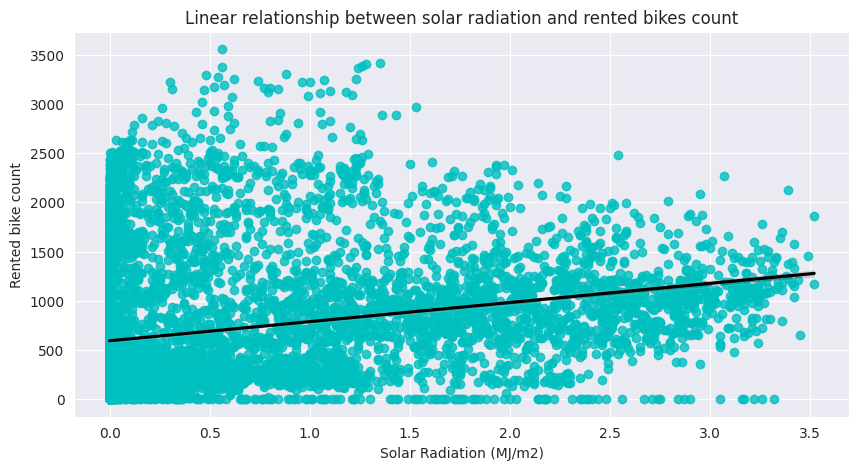

In [57]:
# Analyzing linear relationship between solar radiation and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['rad'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between solar radiation and rented bikes count')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented bike count')

* ***We can see a positive relationship between solar radiation and rented bike counts.***

* ***The more solar radiation, the higher the bike rental count.***

####**Rainfall (mm)**

Text(0, 0.5, 'Rented bike count')

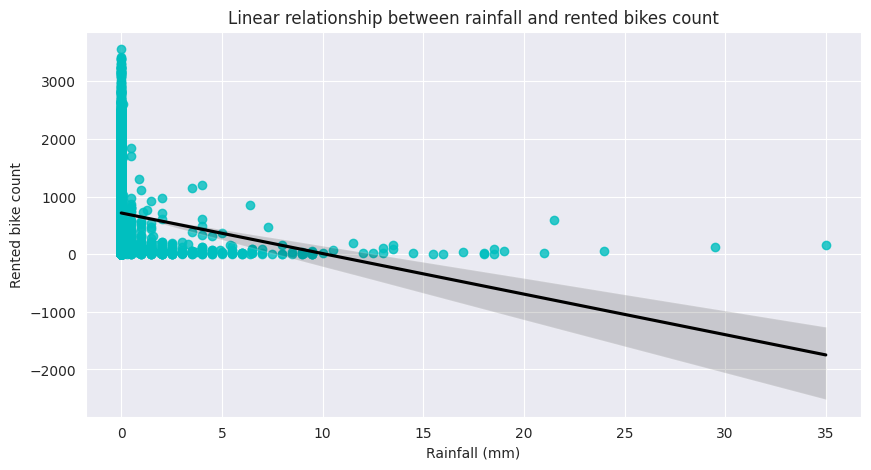

In [58]:
# Analyzing linear relationship between rainfall and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['rain'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between rainfall and rented bikes count')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Rented bike count')

* ***We can see a negative relationship between rainfall and the dependent variable.***

* ***When there is high rainfall, there are fewer bike rentals.***

####**Snowfall (cm)**

Text(0, 0.5, 'Rented bike count')

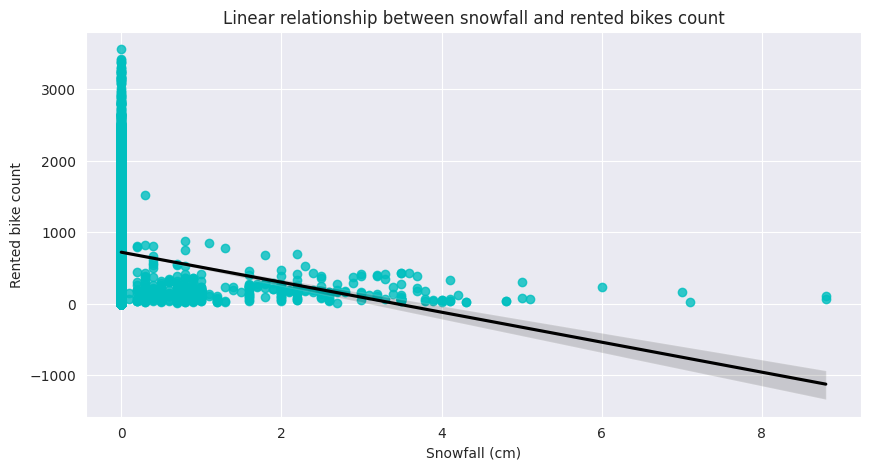

In [59]:
# Analyzing linear relationship between snowfall and rented bikes count.

plt.figure(figsize=(10,5))
sns.regplot(x=df['snow'],y=df['rbc'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between snowfall and rented bikes count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented bike count')

* ***Snowfall showed a negative relationship with the dependent variable.***

* ***The higher the snowfall, the lower the bike rentals.***

##**Univariate Analysis**

### **Checking distributions of independent variables**

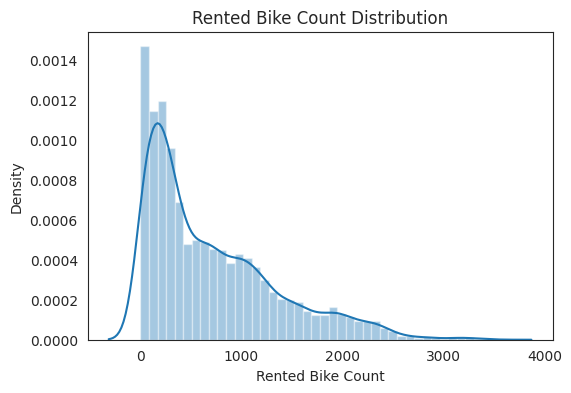

In [60]:
# Distribution for 'Rented Bike Count'.

sns.set_style(style='white')
plt.figure(figsize=(6,4))
sns.distplot(df['rbc'])
plt.xlabel('Rented Bike Count',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Rented Bike Count Distribution')
plt.show()

* ***Our dependent variable is showing a moderate right skewness.***

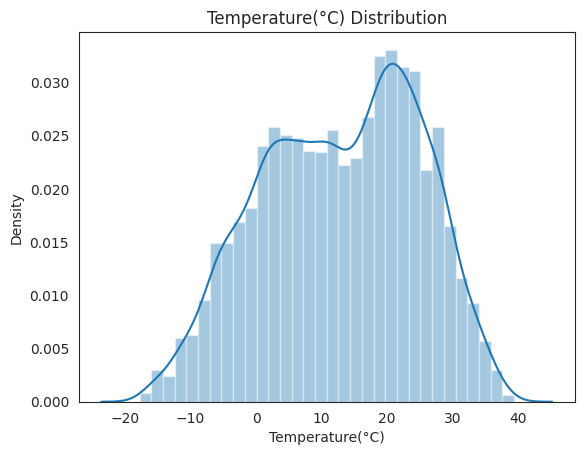

In [61]:
# Distribution for Temperature(°C) column.

sns.distplot(df['temp'])
plt.xlabel('Temperature(°C)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Temperature(°C) Distribution')
plt.show()

* ***Temperature is showing near to normal distribution.***

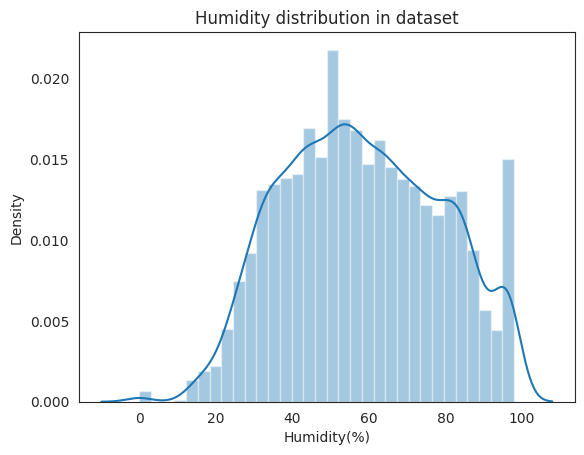

In [62]:
# Distribution for Humidity(%) column.

sns.distplot(df['hum'])
plt.xlabel('Humidity(%)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Humidity distribution in dataset')
plt.show()

* ***Humidity is showing a normal distribution.***

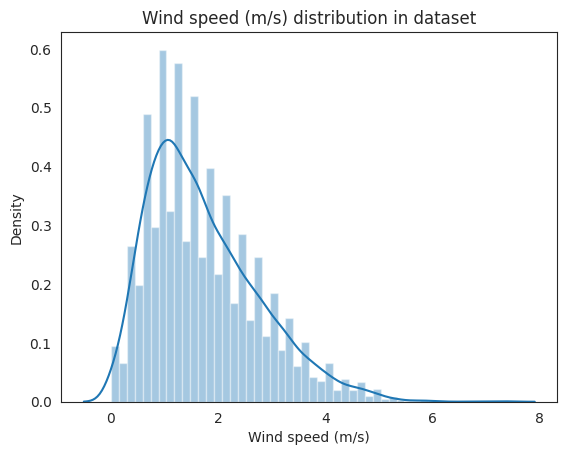

In [63]:
# Distribution for Wind speed (m/s) column.

sns.distplot(df['wind'])
plt.xlabel('Wind speed (m/s)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Wind speed (m/s) distribution in dataset')
plt.show()

* ***Wind speed is showing little right skewness in the distribution.***

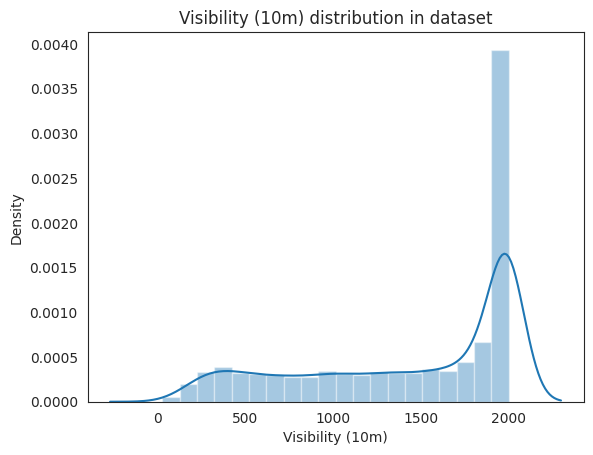

In [64]:
# Distribution for Visibility (10m) column.

sns.distplot(df['visib'])
plt.xlabel('Visibility (10m)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Visibility (10m) distribution in dataset')
plt.show()

* ***Visibility feature is left skewd in distribution.***

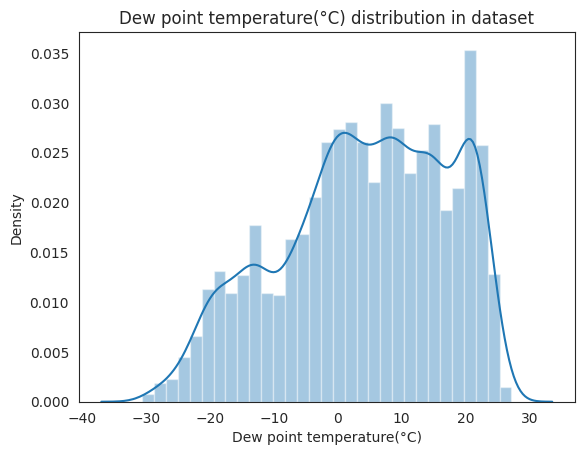

In [65]:
# Distribution for Dew point temperature(°C) column.

sns.distplot(df['dpt'])
plt.xlabel('Dew point temperature(°C)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Dew point temperature(°C) distribution in dataset')
plt.show()

* ***Dew point temperature is showing near to normal distribution.***

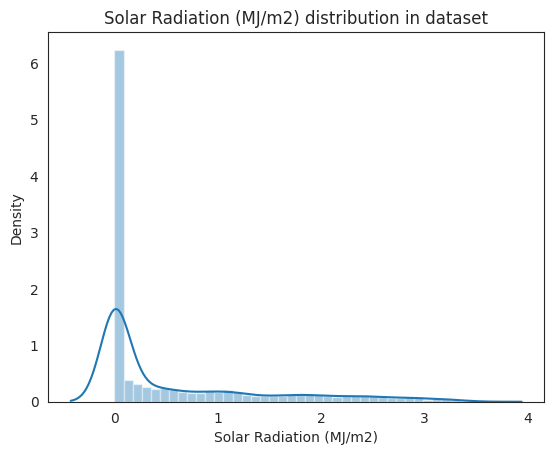

In [66]:
# Distribution for Solar Radiation (MJ/m2) column.

sns.distplot(df['rad'])
plt.xlabel('Solar Radiation (MJ/m2)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Solar Radiation (MJ/m2) distribution in dataset')
plt.show()

* ***Solar Radiation feature is right skewed.***

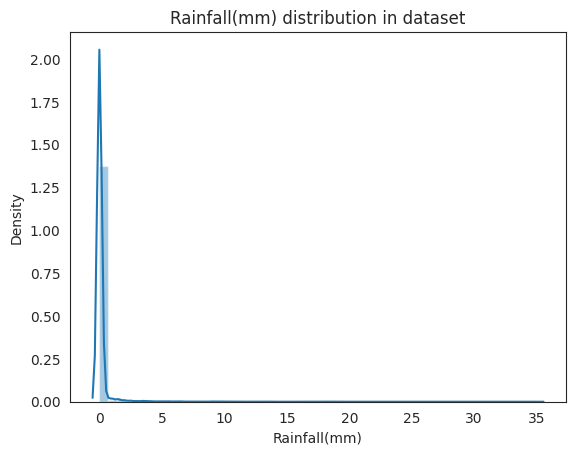

In [67]:
# Distribution for Rainfall(mm) column.

sns.distplot(df['rain'])
plt.xlabel('Rainfall(mm)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Rainfall(mm) distribution in dataset')
plt.show()

* ***Extreme right skewed distribution is followed***

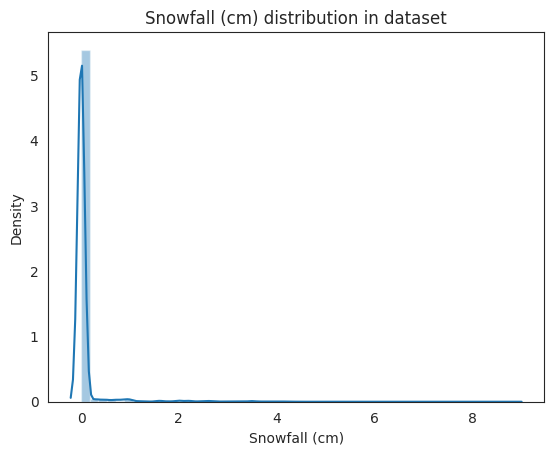

In [68]:
# Distribution for Snowfall (cm) column.

sns.distplot(df['snow'])
plt.xlabel('Snowfall (cm)',fontsize=10)
plt.ylabel('Density',fontsize=10)
plt.title('Snowfall (cm) distribution in dataset')
plt.show()

* ***Snowfall feature is following extreme right skewness.***

* ***In all the above plots, we were checking distributions of various numerical variable's as if the distribution's are normal in nature then it could be very helpful in further analysis.***

##**Correlation Heatmap**

**What is a correlation heatmap?**

* ***We can define a heatmap as a visual representation of the correlation between all the variables present in the data frame.***

* ***To represent this, it uses a system of colour palettes ranging from light to dark, demonstrating low to high positive or negative correlation.***

<Axes: >

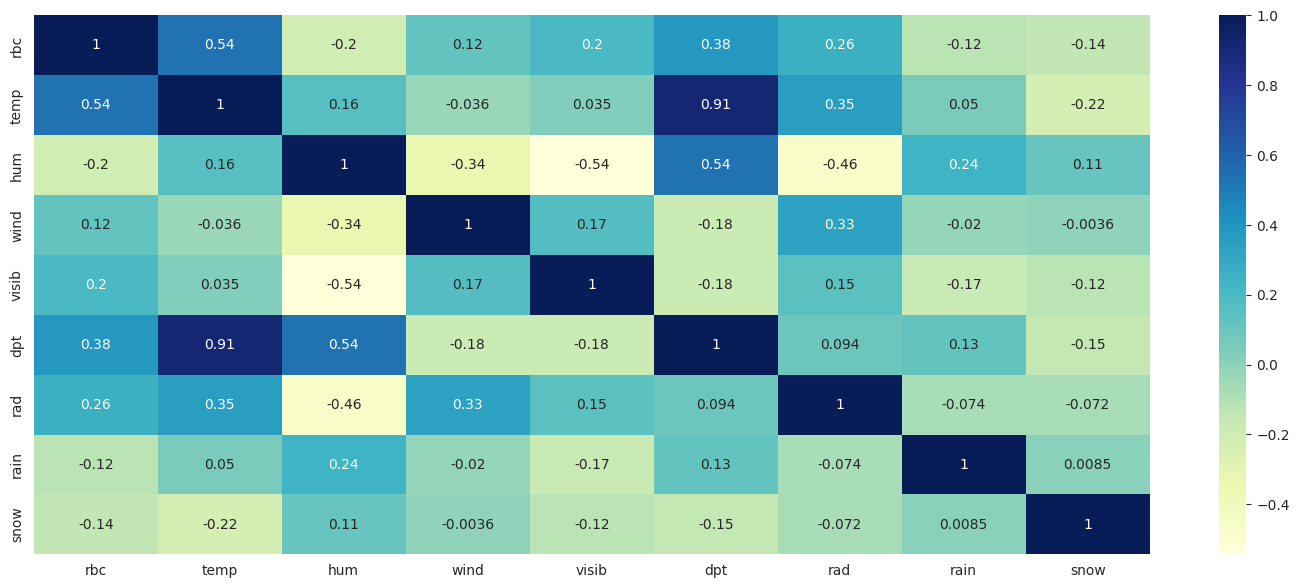

In [69]:
# Correlation heatmap of our dataset.

plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

 **As we can conclude by the above plot :-**

 * ***Temperature, dew point temperature, solar radiation, and visibility are showing positive correlations, whereas snowfall, rainfall, and humidity are showing negative correlations with the target variable.***

#**Hypothesis Testing**

**What is Hypothesis testing?**

* ***We can define hypothesis testing as a method of statistical inference which is used to determine if the evidence at hand sufficiently supports a given hypothesis. Hypothesis testing enables us to make probabilistic assumptions regarding population parameters.***

* ***At first, we have to assume few hypothetical statements upon which we could perform hypothesis testing.***

* ***Let's assume these three statements :***

 * **At any given time, the average number of bikes in Seoul is more than 100.**

 *  **At any location in Seoul, the average temperature exceeds 10 degrees Celsius.**

 * **In Seoul, the standard deviation of humidity is 20.**


 * **Formula to calculate hypothesis testing
 Z = ( x̅ – μ0 ) / (σ /√n),**

  **Here, x̅ is the sample mean,
 μ0 is the population mean,
 σ is the standard deviation,
 n is the sample size.**


###**Hypothetical Statement 1**

**This is our research hypothesis :**
* "**At any given time, the average number of bikes in Seoul is more than 100.**"

* **Null Hypothesis ($H_0$) : Average = 100**

* **Alternate Hypothesis ($H_a$) : Average > 100**

In [70]:
# Performing appropriate statistical test for p-value.

hs = df['rbc'].sample(600)    # Randomly taking sample of 600 data points.
hm = hs.mean()                # Calculating mean of those sampled data points.
hs = hs.std()                 # Calculating standard deviation of those sampled data points.

In [71]:
# Implementing hypothesis testing formula.

tf = (hm-100)/(hs/(np.sqrt(600)))
tf

23.366054230002963

In [72]:
# Calculating probability.

from scipy.stats import norm
pro_z = norm.cdf(9.3441, 0, 1)
print(pro_z)

1.0


In [73]:
# Calculating P-Value

p1 = 1-pro_z
p1

0.0

* **To get the p-value, we used the Z-test**.

* **We have enough data to reject $H_0$ because the likelihood we obtained is close to 100%. As a result, the average bike count in Seoul is greater than 100 at any one moment.**

###**Hypothetical Statement 2**

**This is our research hypothesis :**
* "**At any location in Seoul, the average temperature exceeds 10 degrees Celsius.**"

* **Null Hypothesis ($H_0$) : Average = 10**

* **Alternate Hypothesis ($H_a$) : Average > 10**

In [74]:
# Performing appropriate statistical test for p-value.

hs = df['temp'].sample(600)    # Randomly taking sample of 600 data points.
hm = hs.mean()                 # Calculating mean of those sampled data points.
hs = hs.std()                  # Calculating standard deviation of those sampled data points.

In [75]:
# Implementing hypothesis testing formula.

tf = (hm-100)/(hs/(np.sqrt(600)))
tf

-181.43564065236131

In [76]:
# Calculating probability.

from scipy.stats import norm
pro_z = norm.cdf(4.90, 0, 1)
print(pro_z)

0.9999995208167234


In [77]:
# Calculating P-Value

p1 = 1-pro_z
p1

4.791832766137816e-07

* **To get the p-value, we used the Z-test**.

* **We have enough data to reject $H_0$ because the likelihood we obtained is close to 99%. As a result, the average bike count in Seoul is greater than 10 degree celsius at any one moment.**

###**Hypothetical Statement 3**

**This is our research hypothesis :**
* "**In Seoul, the standard deviation of humidity is 20.**"

* **Null Hypothesis ($H_0$) : Standard deviation != 20**

* **Alternate Hypothesis ($H_a$) : Standard deviation = 20**

In [78]:
# Performing appropriate statistical test for p-value.

hum = df['hum'].sample(50)    # Randomly taking sample of 50 data points.
hs = (np.std(hum))**2

In [79]:
# Computing test statistic.

ts = (49 * hs)/(20*20)
ts

47.977664000000004

In [80]:
# Calculating probability.

from scipy.stats import chi2
prob = chi2.cdf(53.55,49)
print(prob)

0.6960317386207685


* **To get the p-value, we used the Chi2-test.**.

* **We picked the Chi2-test to calculate the p-value since we are doing hypothesis testing for standard deviation. We have enough data to reject $H_0$ based on the likelihood we obtained of 69%. As a result, the humidity standard deviation is 20.**

#**Feature Engineering and Data-preprocessing**

##**Checking Missing and Duplicate values**

In [81]:
# Checking null values.

df.isnull().sum()

rbc                0
hour               0
temp               0
hum                0
wind               0
visib              0
dpt                0
rad                0
rain               0
snow               0
Seasons            0
Holiday            0
Functioning Day    0
month              0
weekend            0
dtype: int64

In [82]:
# Checking duplicate values.

values = len(df[df.duplicated()])
print(f'Number of duplicated values : {values}')

Number of duplicated values : 0


* ***As we can see there are no missing and duplicate values in this dataframe.***

##**Data Transformation and Handling Outliers**

Text(0.5, 1.0, 'Distribution of rented bike count')

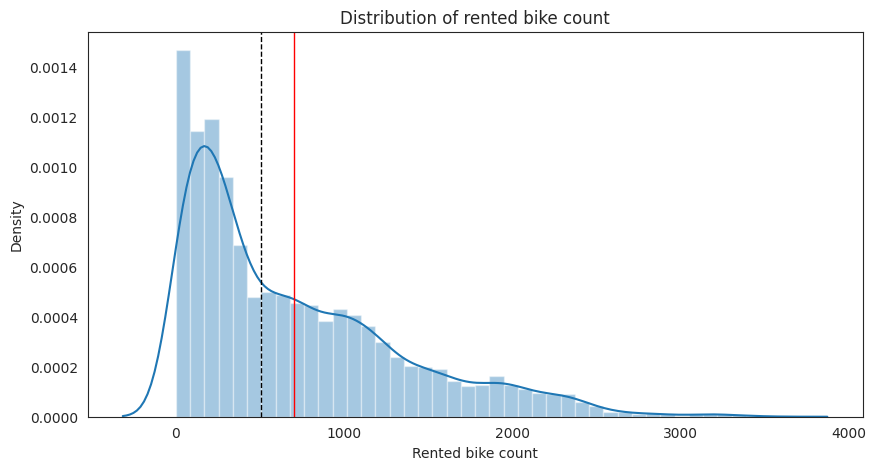

In [83]:
# Checking distribution of our target variable.

fig,ax=plt.subplots(figsize=(10,5))
sns.distplot(df['rbc'])
ax.axvline(df['rbc'].mean(),linewidth=1,color='red',linestyle='solid')
ax.axvline(df['rbc'].median(),linewidth=1,color='black',linestyle='dashed')
plt.xlabel('Rented bike count')
plt.title('Distribution of rented bike count')

* ***As we can conclude from the above plot, our target variable is moderately right-skewed.***

* ***In the above plot, the red solid line depicts the mean of the variable, whereas the dashed black line represents the median of the plot..***

* ***Linear models such as liner regression, logistic regression,etc. assume that the distribution of features is normal in nature, and they perform well (accurate) when the distribution of the target variable is normal in nature; therefore, we have to perform some operations to make it normal.***

Text(0, 0.5, 'Rented bike count')

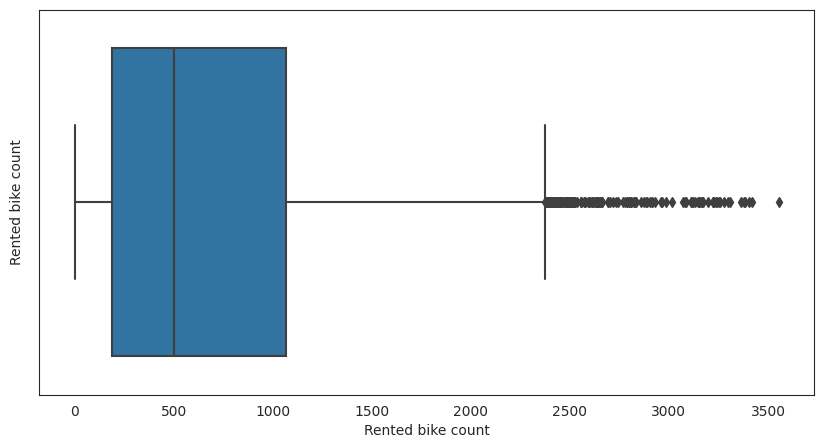

In [84]:
# Creating a boxplot of rented bike count column to check outliers.

plt.figure(figsize=(10,5))
sns.boxplot(x=df['rbc'])
plt.xlabel('Rented bike count')
plt.ylabel('Rented bike count')

* ***We can see from the boxplot above that there are many outliers in the target variable.***

* ***Performing a square root transformation to treat the moderate right skewness of the dependent variable***

Text(0.5, 1.0, 'Near normal distribution of target variable after square-root transformation')

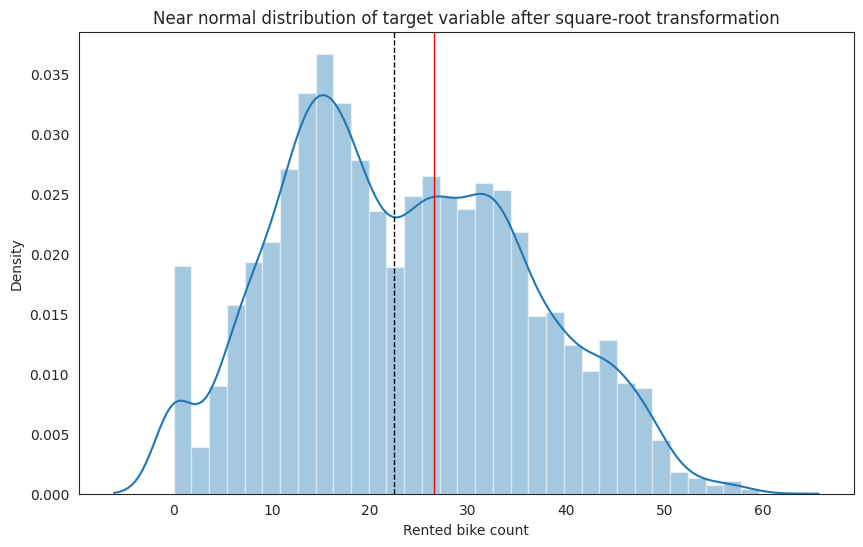

In [85]:
# Applying square root transfromation to treat the right skewness of the distribution.

fig,ax = plt.subplots(figsize=(10,6))
sns.distplot(np.sqrt(df['rbc']))
ax.axvline(np.sqrt(df['rbc'].mean()),linewidth=1,color='red',linestyle='solid')
ax.axvline(np.sqrt(df['rbc'].median()),color='black',linestyle='dashed',linewidth=1)
plt.xlabel('Rented bike count')
plt.title('Near normal distribution of target variable after square-root transformation')

* ***After applying the square root transformation, we can see the distribution of the target variable is now near normal.***

* ***The red line depicts the mean, while the dashed black line depicts the median.***

Text(0, 0.5, 'Rented bike count')

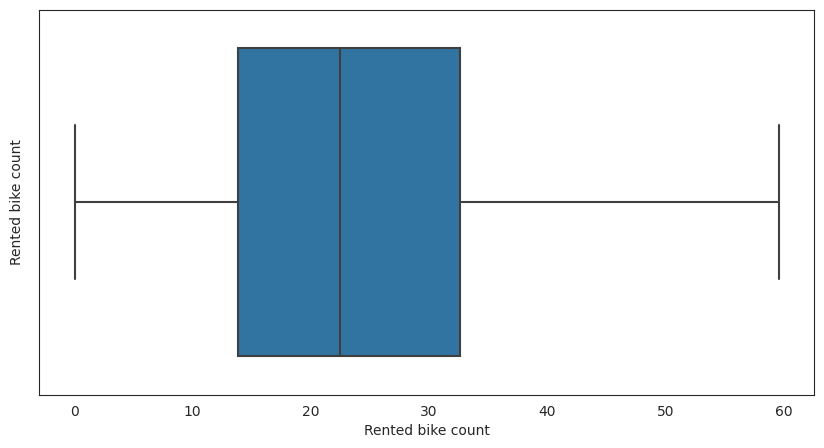

In [86]:
# Checking for outliers after transfromation.

plt.figure(figsize=(10,5))
sns.boxplot(x=np.sqrt(df['rbc']))
plt.xlabel('Rented bike count')
plt.ylabel('Rented bike count')

* ***We can see in the above boxplot there are no outliers present after the transfomation***

##**Feature engineering**

<Axes: >

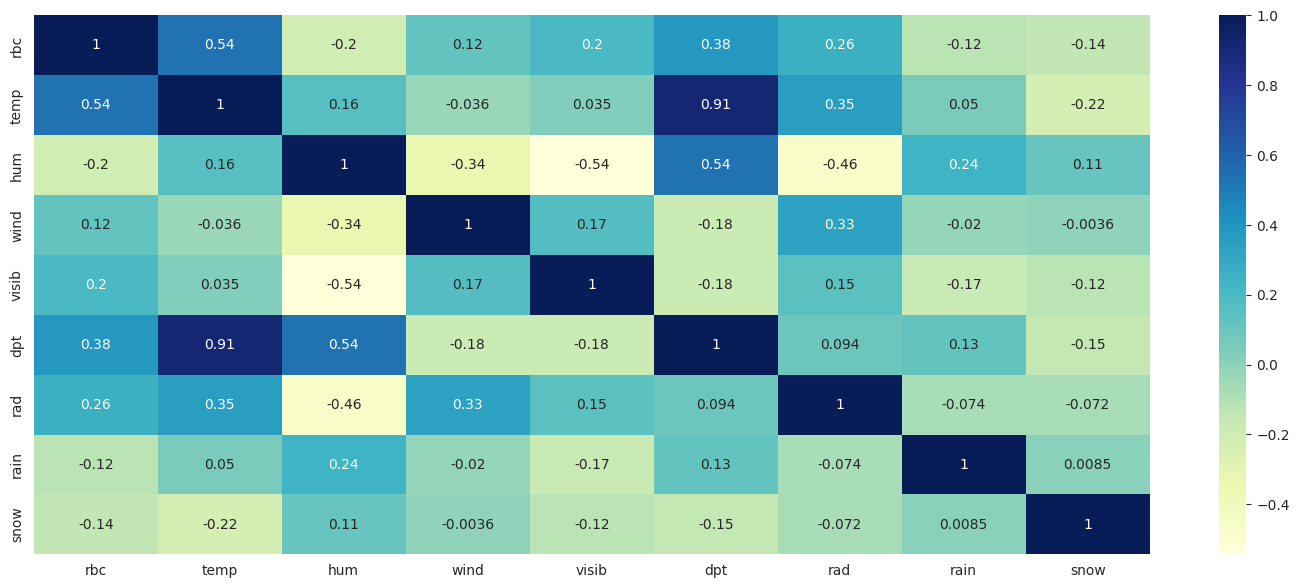

In [87]:
# Correlation heatmap of our dataset.

plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

 * ***Dew point temperature and temperature are showing a high positive correlation.***

In [88]:
# Dropping dew point temperature column.

df.drop('dpt',axis=1,inplace=True)

* ***Dew point temperature and temperature are showing a high positive correlation, so we are dropping the dew point temperature column as it can have an effect on the output as well as in an attempt to remove multicollinearity.***

In [89]:
df.head()

rbc hour  temp  hum  wind  visib  rad  rain  snow Seasons     Holiday  \
0  254    0  -5.2   37   2.2   2000  0.0   0.0   0.0  Winter  No Holiday   
1  204    1  -5.5   38   0.8   2000  0.0   0.0   0.0  Winter  No Holiday   
2  173    2  -6.0   39   1.0   2000  0.0   0.0   0.0  Winter  No Holiday   
3  107    3  -6.2   40   0.9   2000  0.0   0.0   0.0  Winter  No Holiday   
4   78    4  -6.0   36   2.3   2000  0.0   0.0   0.0  Winter  No Holiday   

  Functioning Day month weekend  
0             Yes     1       0  
1             Yes     1       0  
2             Yes     1       0  
3             Yes     1       0  
4             Yes     1       0

* ***We can see above in the dataframe that a column has been dropped.***

###**One hot encoding**

**What is one hot encoding?**

* ***It is a technique that is used in machine learning models to represent categorical variables in the form of numerical values.***

In [90]:
# To display all columns in the output.

pd.set_option('display.max_columns', None)

In [91]:
# Performig one hot encoding on the datset.

df = pd.get_dummies(df)
df.head()

rbc  temp  hum  wind  visib  rad  rain  snow  hour_0  hour_1  hour_2  \
0  254  -5.2   37   2.2   2000  0.0   0.0   0.0       1       0       0   
1  204  -5.5   38   0.8   2000  0.0   0.0   0.0       0       1       0   
2  173  -6.0   39   1.0   2000  0.0   0.0   0.0       0       0       1   
3  107  -6.2   40   0.9   2000  0.0   0.0   0.0       0       0       0   
4   78  -6.0   36   2.3   2000  0.0   0.0   0.0       0       0       0   

   hour_3  hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  hour_11  \
0       0       0       0       0       0       0       0        0        0   
1       0       0       0       0       0       0       0        0        0   
2       0       0       0       0       0       0       0        0        0   
3       1       0       0       0       0       0       0        0        0   
4       0       1       0       0       0       0       0        0        0   

   hour_12  hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hour_20  hour_21  hour_22  hour_23  Seasons_Autumn  Seasons_Spring  \
0        0        0        0        0               0               0   
1        0        0        0        0               0               0   
2        0        0        0        0               0               0   
3        0        0        0        0               0               0   
4        0        0        0        0               0               0   

   Seasons_Summer  Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  \
0               0               1                0                   1   
1               0               1                0                   1   
2               0               1                0                   1   
3               0               1                0                   1   
4               0               1                0                   1   

   Functioning Day_No  Functioning Day_Yes  month_1  month_2  month_3  \
0                   0                    1        1        0        0   
1                   0                    1        1        0        0   
2                   0                    1        1        0        0   
3                   0                    1        1        0        0   
4                   0                    1        1        0        0   

   month_4  month_5  month_6  month_7  month_8  month_9  month_10  month_11  \
0        0        0        0        0        0        0         0         0   
1        0        0        0        0        0        0         0         0   
2        0        0        0        0        0        0         0         0   
3        0        0        0        0        0        0         0         0   
4        0        0        0        0        0        0         0         0   

   month_12  weekend_0  weekend_1  
0         0          1          0  
1         0          1          0  
2         0          1          0  
3         0          1          0  
4         0          1          0

In [92]:
# Checking new columns after one hot encoding.

df.columns

Index(['rbc', 'temp', 'hum', 'wind', 'visib', 'rad', 'rain', 'snow', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekend_0', 'weekend_1'],
      dtype='object')

#**Model Training**

##**Train Test Split**

**What is a train - test split ?**

* ***Before feeding the data into a machine learning algorithm, it is preferred that a train-test split be performed, which divides the whole dataset into two parts: training data and testing data. While training data is used to train the model, testing data is used to check how accurately the model is performing and if it requires further tuning or not.***

* ***We are taking a ratio of 80:20, i.e., 80% of training data and 20% of testing data.***

In [93]:
# Assigning all the independent variables to X.

X = df.drop('rbc',axis=1)
X.head()

temp  hum  wind  visib  rad  rain  snow  hour_0  hour_1  hour_2  hour_3  \
0  -5.2   37   2.2   2000  0.0   0.0   0.0       1       0       0       0   
1  -5.5   38   0.8   2000  0.0   0.0   0.0       0       1       0       0   
2  -6.0   39   1.0   2000  0.0   0.0   0.0       0       0       1       0   
3  -6.2   40   0.9   2000  0.0   0.0   0.0       0       0       0       1   
4  -6.0   36   2.3   2000  0.0   0.0   0.0       0       0       0       0   

   hour_4  hour_5  hour_6  hour_7  hour_8  hour_9  hour_10  hour_11  hour_12  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0        0        0   
4       1       0       0       0       0       0        0        0        0   

   hour_13  hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hour_21  hour_22  hour_23  Seasons_Autumn  Seasons_Spring  Seasons_Summer  \
0        0        0        0               0               0               0   
1        0        0        0               0               0               0   
2        0        0        0               0               0               0   
3        0        0        0               0               0               0   
4        0        0        0               0               0               0   

   Seasons_Winter  Holiday_Holiday  Holiday_No Holiday  Functioning Day_No  \
0               1                0                   1                   0   
1               1                0                   1                   0   
2               1                0                   1                   0   
3               1                0                   1                   0   
4               1                0                   1                   0   

   Functioning Day_Yes  month_1  month_2  month_3  month_4  month_5  month_6  \
0                    1        1        0        0        0        0        0   
1                    1        1        0        0        0        0        0   
2                    1        1        0        0        0        0        0   
3                    1        1        0        0        0        0        0   
4                    1        1        0        0        0        0        0   

   month_7  month_8  month_9  month_10  month_11  month_12  weekend_0  \
0        0        0        0         0         0         0          1   
1        0        0        0         0         0         0          1   
2        0        0        0         0         0         0          1   
3        0        0        0         0         0         0          1   
4        0        0        0         0         0         0          1   

   weekend_1  
0          0  
1          0  
2          0  
3          0  
4          0

In [94]:
# Assigning our target variable to Y.

y = np.sqrt(df['rbc'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: rbc, dtype: float64

In [95]:
# Creating train test split.

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.25,random_state=42)
print(Xtrain.shape)
print(Xtest.shape)

(6570, 53)
(2190, 53)


* ***There are 6570 rows and 53 columns in our training dataset, whereas there are 2190 rows and 53 columns in our testing dataset, as we took a ratio of 80:20 for our training and testing sets.***

In [96]:
df.columns

Index(['rbc', 'temp', 'hum', 'wind', 'visib', 'rad', 'rain', 'snow', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday',
       'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekend_0', 'weekend_1'],
      dtype='object')

##**ML Model Implementation**

###**Linear Regression**

####**Fitting the model**

**What is linear regression?**

* **A brief idea about linear regression**

* ***Linear regression is a machine learning model that establishes relationship between independent variable and dependent variable to forecast predictive analysis by fitting a straight line through these variables data points i.e this line is known as the line of best fit.***

* ***It assumes the features of the dependent variable to be normal in nature as it performs well on a normal distributed data.***

* ***A simple linear regression follows a straight line equation-***
 ***$$ \text{Y} = \beta_0 + \beta_1x$$ where $x$ is the independent variable, $Y$ is the dependent variable, $\beta_1 $ is the slope or coefficient and $\beta_0$ is the intercept.***

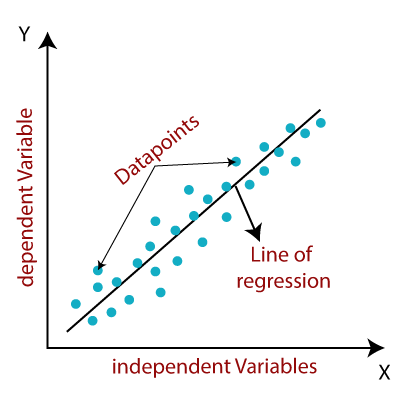

In [97]:
# Implementing linear regression model and checking training and testing accuracies.

lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print('Training Accuracy -',lr.score(Xtrain,ytrain))
print('Testing Accuracy  -' ,lr.score(Xtest,ytest))

Training Accuracy - 0.7632771473057378
Testing Accuracy  - 0.7419010342762523


In [98]:
# Using this model to predict rental bike counts by using our testing set.

ypred = pd.DataFrame(lr.predict(Xtest))
ypred

0
0     39.083467
1     33.920777
2     32.821358
3     42.994784
4     24.252984
...         ...
2185  12.781493
2186  35.335934
2187  34.737697
2188  -1.213115
2189  20.565262

[2190 rows x 1 columns]

In [99]:
# Calculating slope.

lr.coef_

array([ 4.59305682e-01, -1.33314385e-01, -1.56999485e-01,  4.30810644e-04,
        1.03565612e+00, -1.94179048e+00, -3.07470415e-02,  1.41390754e+08,
        1.41390752e+08,  1.41390749e+08,  1.41390747e+08,  1.41390745e+08,
        1.41390745e+08,  1.41390750e+08,  1.41390756e+08,  1.41390761e+08,
        1.41390755e+08,  1.41390751e+08,  1.41390751e+08,  1.41390751e+08,
        1.41390751e+08,  1.41390751e+08,  1.41390752e+08,  1.41390754e+08,
        1.41390758e+08,  1.41390764e+08,  1.41390761e+08,  1.41390761e+08,
        1.41390761e+08,  1.41390759e+08,  1.41390756e+08, -3.51245393e+09,
       -3.51245394e+09, -3.51245394e+09, -3.51245394e+09,  2.95688917e+08,
        2.95688920e+08,  4.51455443e+07,  4.51455730e+07,  3.74654160e+08,
        3.74654160e+08,  3.74654161e+08,  3.74654160e+08,  3.74654162e+08,
        3.74654165e+08,  3.74654160e+08,  3.74654160e+08,  3.74654160e+08,
        3.74654162e+08,  3.74654161e+08,  3.74654161e+08, -3.54031797e+08,
       -3.54031798e+08])

####**Evaluation Metrics**

In [100]:
# Importing the evaluation metrics package.

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error

In [101]:
# Checking various evaluation metrics.

mse = mean_squared_error(ytest,ypred)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,ypred)
print('MAE         :',mae)

r2 = r2_score(ytest,ypred)
print('R2          :',r2)

adjr2 = (1-(1-r2_score(ytest, ypred))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))
print('Adjusted R2 :',adjr2)

MSE         : 39.062127292774484
RMSE        : 6.249970183350836
MAE         : 4.645397170278217
R2          : 0.7419010342762523
Adjusted R2 : 0.7354968932728072


* ***Here, we got a r2 value of 74% for this model.***

In [102]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Linear Regression',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [103]:
# Creating a new dataframe to store evaluation metrics values for later comparison.

cdf =  pd.DataFrame(dict1,index=[1])
cdf

Model     MSE  RMSE    MAE    R2  Adjusted R2
1  Linear Regression  39.062  6.25  4.645  0.74         0.74

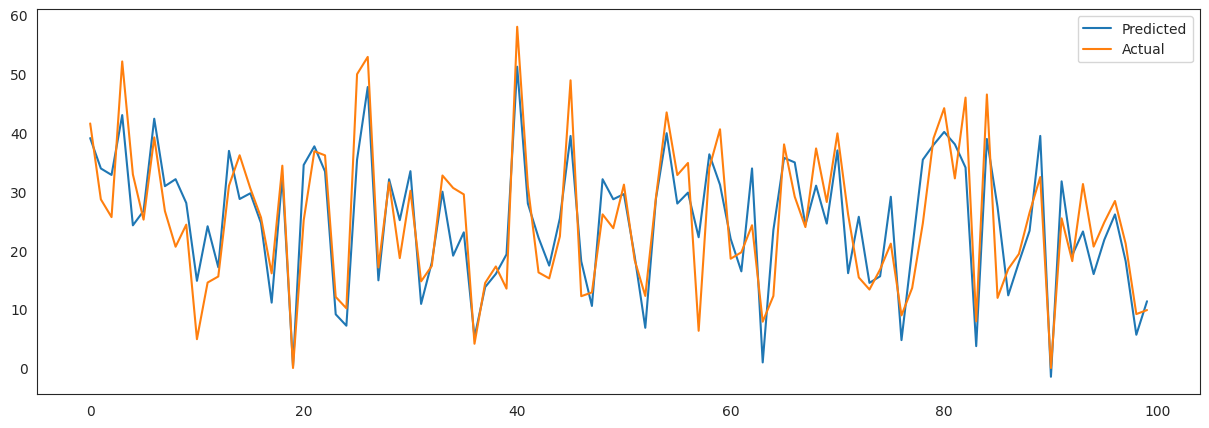

In [104]:
# Comparison between actual and predicted values of the target variable.

plt.figure(figsize=(15,5))
plt.plot((ypred)[:100])
plt.plot((np.array(ytest)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

* ***In the above plot we can see the performance of this model on our dataset by comparing the trend lines for both actual and predicted values.***

###**Lasso Regression**

####**Fitting the model**

In [105]:
# Importing the algorithm and fitting variables in it.

from sklearn.linear_model import Lasso
lar = Lasso(alpha = 1)
lar.fit(Xtrain,ytrain)

Lasso(alpha=1)

In [106]:
# Checking the training and testing accuracies.

print('Training accuracy -',lar.score(Xtrain,ytrain))
print('Testing accuracy -',lar.score(Xtest,ytest))

Training accuracy - 0.3930064164714583
Testing accuracy - 0.42509474234099964


In [107]:
# Finding the value of slopes or coefficients for this model.

lar.coef_

array([ 6.01182320e-01, -1.78589341e-01,  0.00000000e+00,  3.27905268e-04,
       -0.00000000e+00, -5.44278943e-01,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00])

In [108]:
# Predicting the values for the testing set based on the lasso regression algo.

ypred = pd.DataFrame(lar.predict(Xtest))
ypred

0
0     30.326196
1     36.394030
2     37.723817
3     27.944282
4     20.839140
...         ...
2185  16.306562
2186  26.783525
2187  28.780042
2188  10.458346
2189  23.036650

[2190 rows x 1 columns]

####**Evaluation metrics**

In [109]:
# Importing the evaluation metrics package.

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_percentage_error,mean_absolute_error

In [110]:
# Checking various evaluation metrics.

mse = mean_squared_error(ytest,ypred)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,ypred)
print('MAE         :',mae)

r2 = r2_score(ytest,ypred)
print('R2          :',r2)

adjr2 = (1-(1-r2_score(ytest, ypred))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))
print('Adjusted R2 :',adjr2)

MSE         : 87.0093465620382
RMSE        : 9.327880067948891
MAE         : 7.089895565129917
R2          : 0.42509474234099964
Adjusted R2 : 0.41082977106013496


* ***We got a r2 score of 42% after L1 regularizing techinique.***

In [111]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Lasso Regression',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [112]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)

In [113]:
cdf

Model     MSE   RMSE    MAE    R2  Adjusted R2
0  Linear Regression  39.062  6.250  4.645  0.74         0.74
1   Lasso Regression  87.009  9.328  7.090  0.43         0.41

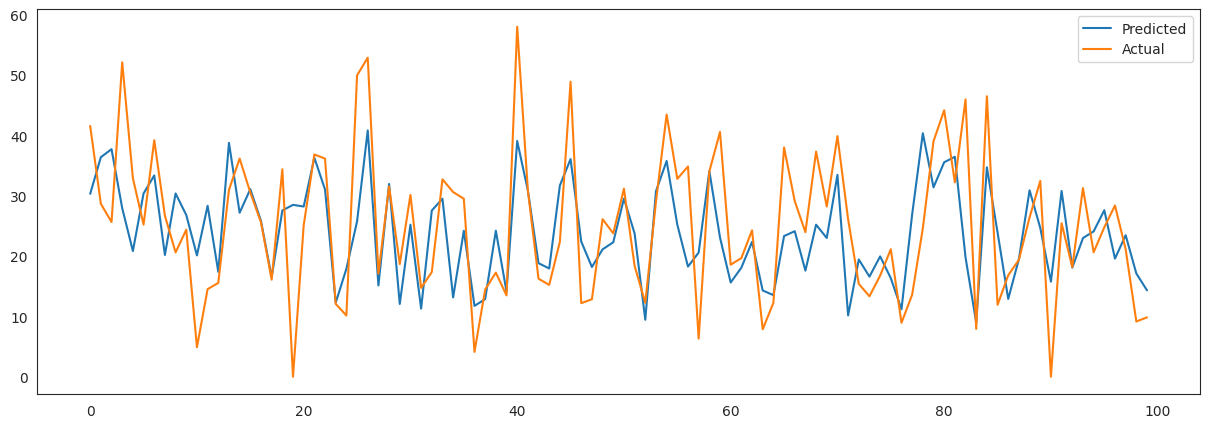

In [114]:
# Comparison between actual and predicted values of the target variable.

plt.figure(figsize=(15,5))
plt.plot((ypred)[:100])
plt.plot((np.array(ytest)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

* ***In the above plot we can see the performance of this model on our dataset by comparing the trend lines for both actual and predicted values.***

####**Cross-Validation & Hyperparameter Tuning**

**What are cross-validation and hyperparameter tuning ?**

* ***We can define "cross-validation" as a technique by which we can cross-validate our model by the process of cross-validation, in which a training set is divided into a number of folds, and among these one set is set as a testing set and the rest as a training set, and this process is repeated until all the folds are once tested as a testing set. In the end, the average accuracy of the folds is calculated.***

* ***Hyperparameter tuning can be defined as the process of tuning the parameters of the model to increase its performance and efficiency of the model.***

* ***These two techniques can either be applied through "grid search" or "random forest". We'll be using both of them in further analysis.***

#####**Lasso Regression using GridSearchCV**

In [115]:
# Importing GridSearchCV and fitting the training set for hyperparameter tuning and cross validation.

from sklearn.model_selection import GridSearchCV
param_grid = {'alpha' : np.arange(10)}
grid = GridSearchCV(lar,param_grid,scoring='r2',cv=10)
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=10, estimator=Lasso(alpha=1),
             param_grid={'alpha': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='r2')

In [116]:
# Testing updated lasso model on testing set.

larg = pd.DataFrame(grid.predict(Xtest))
larg

0
0     39.083493
1     33.920750
2     32.821371
3     42.994795
4     24.252982
...         ...
2185  12.781441
2186  35.335928
2187  34.737661
2188  -1.213169
2189  20.565292

[2190 rows x 1 columns]

In [117]:
# Calculating best parameters for our model with grid search cv.

print('Best parameter -',grid.best_params_)
print('Best score     -',grid.best_score_)
print('Best estimator -',grid.best_estimator_)

Best parameter - {'alpha': 0}
Best score     - 0.7580122694427756
Best estimator - Lasso(alpha=0)


In [118]:
# Evaluation metrics for this updated model.

mse = mean_squared_error(ytest,larg)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,larg)
print('MAE         :',mae)

r2 = grid.best_score_
print('R2          :',r2)

adjr2 = 1-((1-r2)*(Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))
print('Adjusted R2 :',adjr2)

MSE         : 39.06213734161307
RMSE        : 6.249970987261706
MAE         : 4.645398907116149
R2          : 0.7580122694427756
Adjusted R2 : 0.7520078922332564


* ***We got a r2 score of 75% for this model after hyperparameter tuning.***

In [119]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Lasso Regression using GridSearchCV',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [120]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model     MSE   RMSE    MAE    R2  \
0                    Linear Regression  39.062  6.250  4.645  0.74   
1                     Lasso Regression  87.009  9.328  7.090  0.43   
2  Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   

   Adjusted R2  
0         0.74  
1         0.41  
2         0.75

###**Ridge Regression**

####**Fitting the model**

In [121]:
# Importing the algorithm and fitting variables in it.

from sklearn.linear_model import Ridge
rr = Ridge(alpha=80)
rr.fit(Xtrain,ytrain)

Ridge(alpha=80)

In [122]:
# Checking the training and testing accuracies.

print('Training accuracy -',rr.score(Xtrain,ytrain))
print('Testing accuracy  -',rr.score(Xtest,ytest))

Training accuracy - 0.7482166050522541
Testing accuracy  - 0.7351827272595173


In [123]:
# Predicting the values for the testing set based on the ridge regression algo.

ypred = pd.DataFrame(rr.predict(Xtest))
ypred

0
0     38.032029
1     33.715917
2     33.746484
3     40.522301
4     23.744158
...         ...
2185  13.334187
2186  34.048104
2187  33.565628
2188   0.324475
2189  20.625819

[2190 rows x 1 columns]

In [124]:
# Finding the value of slopes or coefficients for this model.

rr.coef_

array([ 5.29163254e-01, -1.53358983e-01,  1.09314170e-01,  3.74352840e-04,
        9.75573268e-02, -1.84415214e+00,  6.21319131e-02, -1.42468674e-01,
       -1.45116661e+00, -3.77254958e+00, -5.63419515e+00, -7.38608981e+00,
       -7.07878863e+00, -3.40584148e+00,  1.56930899e+00,  5.79374915e+00,
        1.25862590e+00, -2.01212014e+00, -2.15923415e+00, -1.57338236e+00,
       -1.65893195e+00, -1.84044266e+00, -1.17799308e+00,  1.18988068e-01,
        3.10935002e+00,  7.55555203e+00,  5.25205887e+00,  4.80006597e+00,
        4.70904419e+00,  3.92743517e+00,  1.19902591e+00,  2.69946184e+00,
        4.44296219e-01, -3.42290820e-01, -2.80146724e+00, -1.24049874e+00,
        1.24049874e+00, -1.18884914e+01,  1.18884914e+01, -6.24623020e-01,
       -1.55569847e+00, -3.33118524e-01, -5.95527952e-01,  5.68724014e-01,
        3.00776305e+00, -7.49573557e-01, -1.34847749e+00, -1.01750281e+00,
        1.64616419e+00,  5.74624315e-01,  4.27246256e-01,  3.51151998e-01,
       -3.51151998e-01])

####**Evaluation metrics**

In [125]:
# Checking various evaluation metrics.

mse = mean_squared_error(ytest,ypred)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,ypred)
print('MAE         :',mae)

r2 = r2_score(ytest,ypred)
print('R2          :',r2)

adjr2 = (1-(1-r2_score(ytest, ypred))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))
print('Adjusted R2 :',adjr2)

MSE         : 40.07891309485529
RMSE        : 6.33079087435806
MAE         : 4.757191094174108
R2          : 0.7351827272595173
Adjusted R2 : 0.7286118866905821


* ***We got a r2 score of 73% for this model.***

In [126]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Ridge Regression',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [127]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model     MSE   RMSE    MAE    R2  \
0                    Linear Regression  39.062  6.250  4.645  0.74   
1                     Lasso Regression  87.009  9.328  7.090  0.43   
2  Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   
3                     Ridge Regression  40.079  6.331  4.757  0.74   

   Adjusted R2  
0         0.74  
1         0.41  
2         0.75  
3         0.73

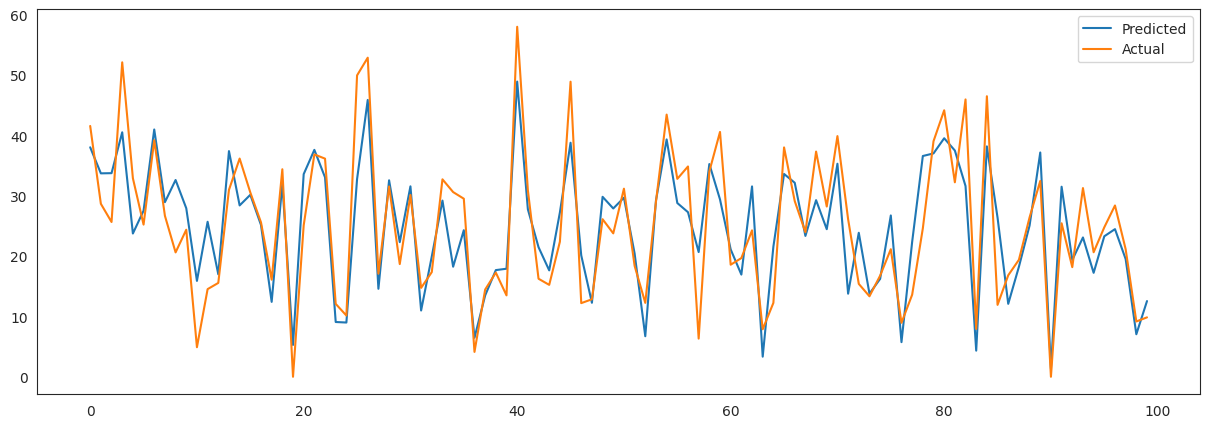

In [128]:
# Comparison between actual and predicted values of the target variable.

plt.figure(figsize=(15,5))
plt.plot((ypred)[:100])
plt.plot((np.array(ytest)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

* ***In the above plot we can see the performance of this model on our dataset by comparing the trend lines for both actual and predicted values.***

####**Cross-Validation & Hyperparameter Tuning**

#####**Ridge Regression using RandomizedSearchCV**

In [129]:
# Importing RandomizedSearchCV and fitting the training set for hyperparameter tuning and cross validation.

from sklearn.model_selection import RandomizedSearchCV
param_grid = {'alpha' : np.arange(1000)}
rand = RandomizedSearchCV(rr,param_grid,scoring='r2',cv=10)
rand.fit(Xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=Ridge(alpha=80),
                   param_distributions={'alpha': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,...
       910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922,
       923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935,
       936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948,
       949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961,
       962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974,
       975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987,
       988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
                   scoring='r2')

In [130]:
# Testing updated ridge model on testing set.

rarg = pd.DataFrame(rand.predict(Xtest))
rarg

0
0     38.595270
1     33.765133
2     33.335169
3     41.741674
4     24.001099
...         ...
2185  13.048835
2186  34.669824
2187  34.146175
2188  -0.437335
2189  20.614289

[2190 rows x 1 columns]

In [131]:
# Calculating best parameters for our model by hyperparamter tuning.

print('Best parameter -',rand.best_params_)
print('Best score     -',rand.best_score_)
print('Best estimator -',rand.best_estimator_)

Best parameter - {'alpha': 36}
Best score     - 0.753531890129413
Best estimator - Ridge(alpha=36)


In [132]:
# Evaluation metrics for this updated model.

mse = mean_squared_error(ytest,rarg)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,rarg)
print('MAE         :',mae)

r2 = rand.best_score_
print('R2          :',r2)

adjr2 = 1-((1-r2)*(Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))
print('Adjusted R2 :',adjr2)

MSE         : 39.02898428042072
RMSE        : 6.247318167055423
MAE         : 4.672598816136948
R2          : 0.753531890129413
Adjusted R2 : 0.7474163424594031


* ***We got a r2 score of 75% for this model after hyperparameter tuning.***

In [133]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Ridge Regression using RandomizedSearchCV',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [134]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model     MSE   RMSE    MAE    R2  \
0                          Linear Regression  39.062  6.250  4.645  0.74   
1                           Lasso Regression  87.009  9.328  7.090  0.43   
2        Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   
3                           Ridge Regression  40.079  6.331  4.757  0.74   
4  Ridge Regression using RandomizedSearchCV  39.029  6.247  4.673  0.75   

   Adjusted R2  
0         0.74  
1         0.41  
2         0.75  
3         0.73  
4         0.75

###**Decision Tree**

####**Fitting the model**

In [135]:
# Importing the algorithm and fitting variables in it.

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, max_features = 10, max_leaf_nodes = 100)
dtr.fit(Xtrain,ytrain)
print('Training accuracy -',dtr.score(Xtrain,ytrain))

Training accuracy - 0.7518978456477088


In [136]:
# Checking the training and testing accuracies.

print('Training accuracy -',dtr.score(Xtrain,ytrain))
print('Testing accuracy -',dtr.score(Xtest,ytest))

Training accuracy - 0.7518978456477088
Testing accuracy - 0.7316770520900384


In [137]:
# Predicting the values for the testing set based on the decision tree algo.

ypred = pd.DataFrame(dtr.predict(Xtest))
ypred

0
0     32.845365
1     32.845365
2     32.845365
3     49.419073
4     32.454176
...         ...
2185  14.879081
2186  43.459871
2187  32.845365
2188   4.874459
2189  18.595467

[2190 rows x 1 columns]

####**Evaluation metrics**

In [138]:
# Checking various evaluation metrics.

mse = mean_squared_error(ytest,ypred)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,ypred)
print('MAE         :',mae)

r2 = r2_score(ytest,ypred)
print('R2          :',r2)

adjr2 = (1-(1-r2_score(ytest, ypred))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))
print('Adjusted R2 :',adjr2)

MSE         : 40.60948139579095
RMSE        : 6.372556896238036
MAE         : 4.670192808706297
R2          : 0.7316770520900384
Adjusted R2 : 0.7250192261353436


* ***We got a r2 score of 71% for this model.***

In [139]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Decision Tree',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [140]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model     MSE   RMSE    MAE    R2  \
0                          Linear Regression  39.062  6.250  4.645  0.74   
1                           Lasso Regression  87.009  9.328  7.090  0.43   
2        Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   
3                           Ridge Regression  40.079  6.331  4.757  0.74   
4  Ridge Regression using RandomizedSearchCV  39.029  6.247  4.673  0.75   
5                              Decision Tree  40.609  6.373  4.670  0.73   

   Adjusted R2  
0         0.74  
1         0.41  
2         0.75  
3         0.73  
4         0.75  
5         0.73

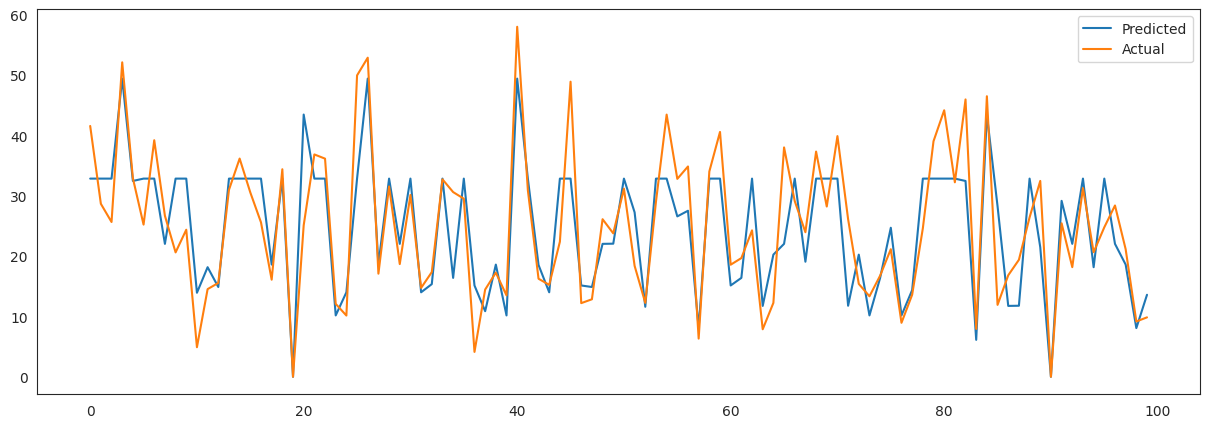

In [141]:
# Comparison between actual and predicted values of the target variable.

plt.figure(figsize=(15,5))
plt.plot((ypred)[:100])
plt.plot((np.array(ytest)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

* ***In the above plot we can see the performance of this model on our dataset by comparing the trend lines for both actual and predicted values.***

####**Cross-Validation & Hyperparameter Tuning**

#####**Decision Tree using RandomizedSearchCV**

In [142]:
# Importing RandomizedSearchCV and fitting the training set for hyperparameter tuning and cross validation.

from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth' : np.arange(50), 'max_features' : np.arange(100), 'max_leaf_nodes' : np.arange(100)}
dtrr = RandomizedSearchCV(dtr,param_grid,scoring='r2',cv=10)
dtrr.fit(Xtrain,ytrain)

RandomizedSearchCV(cv=10,
                   estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=10,
                                                   max_features=10,
                                                   max_leaf_nodes=100),
                   param_distributions={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': array([ 0,  1,  2,  3,  4,  5,  6,  7...
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                                        'max_leaf_nodes': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
                   scoring='r2')

In [143]:
# Storing best updated parameters after hyperparameter tuning.

x = dtrr.best_estimator_

In [144]:
# Testing updated decision tree model on testing set.

rarg = pd.DataFrame(dtrr.predict(Xtest))
rarg

0
0     43.436132
1     26.526721
2     26.526721
3     45.756381
4     22.903568
...         ...
2185  14.111071
2186  45.503768
2187  43.436132
2188   7.371316
2189  19.235524

[2190 rows x 1 columns]

In [145]:
# Calculating best parameters for our model by hyperparamter tuning.

print('Best parameter -',dtrr.best_params_)
print('Best score     -',dtrr.best_score_)
print('Best estimator -',dtrr.best_estimator_)

Best parameter - {'max_leaf_nodes': 96, 'max_features': 38, 'max_depth': 39}
Best score     - 0.8250042007573508
Best estimator - DecisionTreeRegressor(criterion='friedman_mse', max_depth=39, max_features=38,
                      max_leaf_nodes=96)


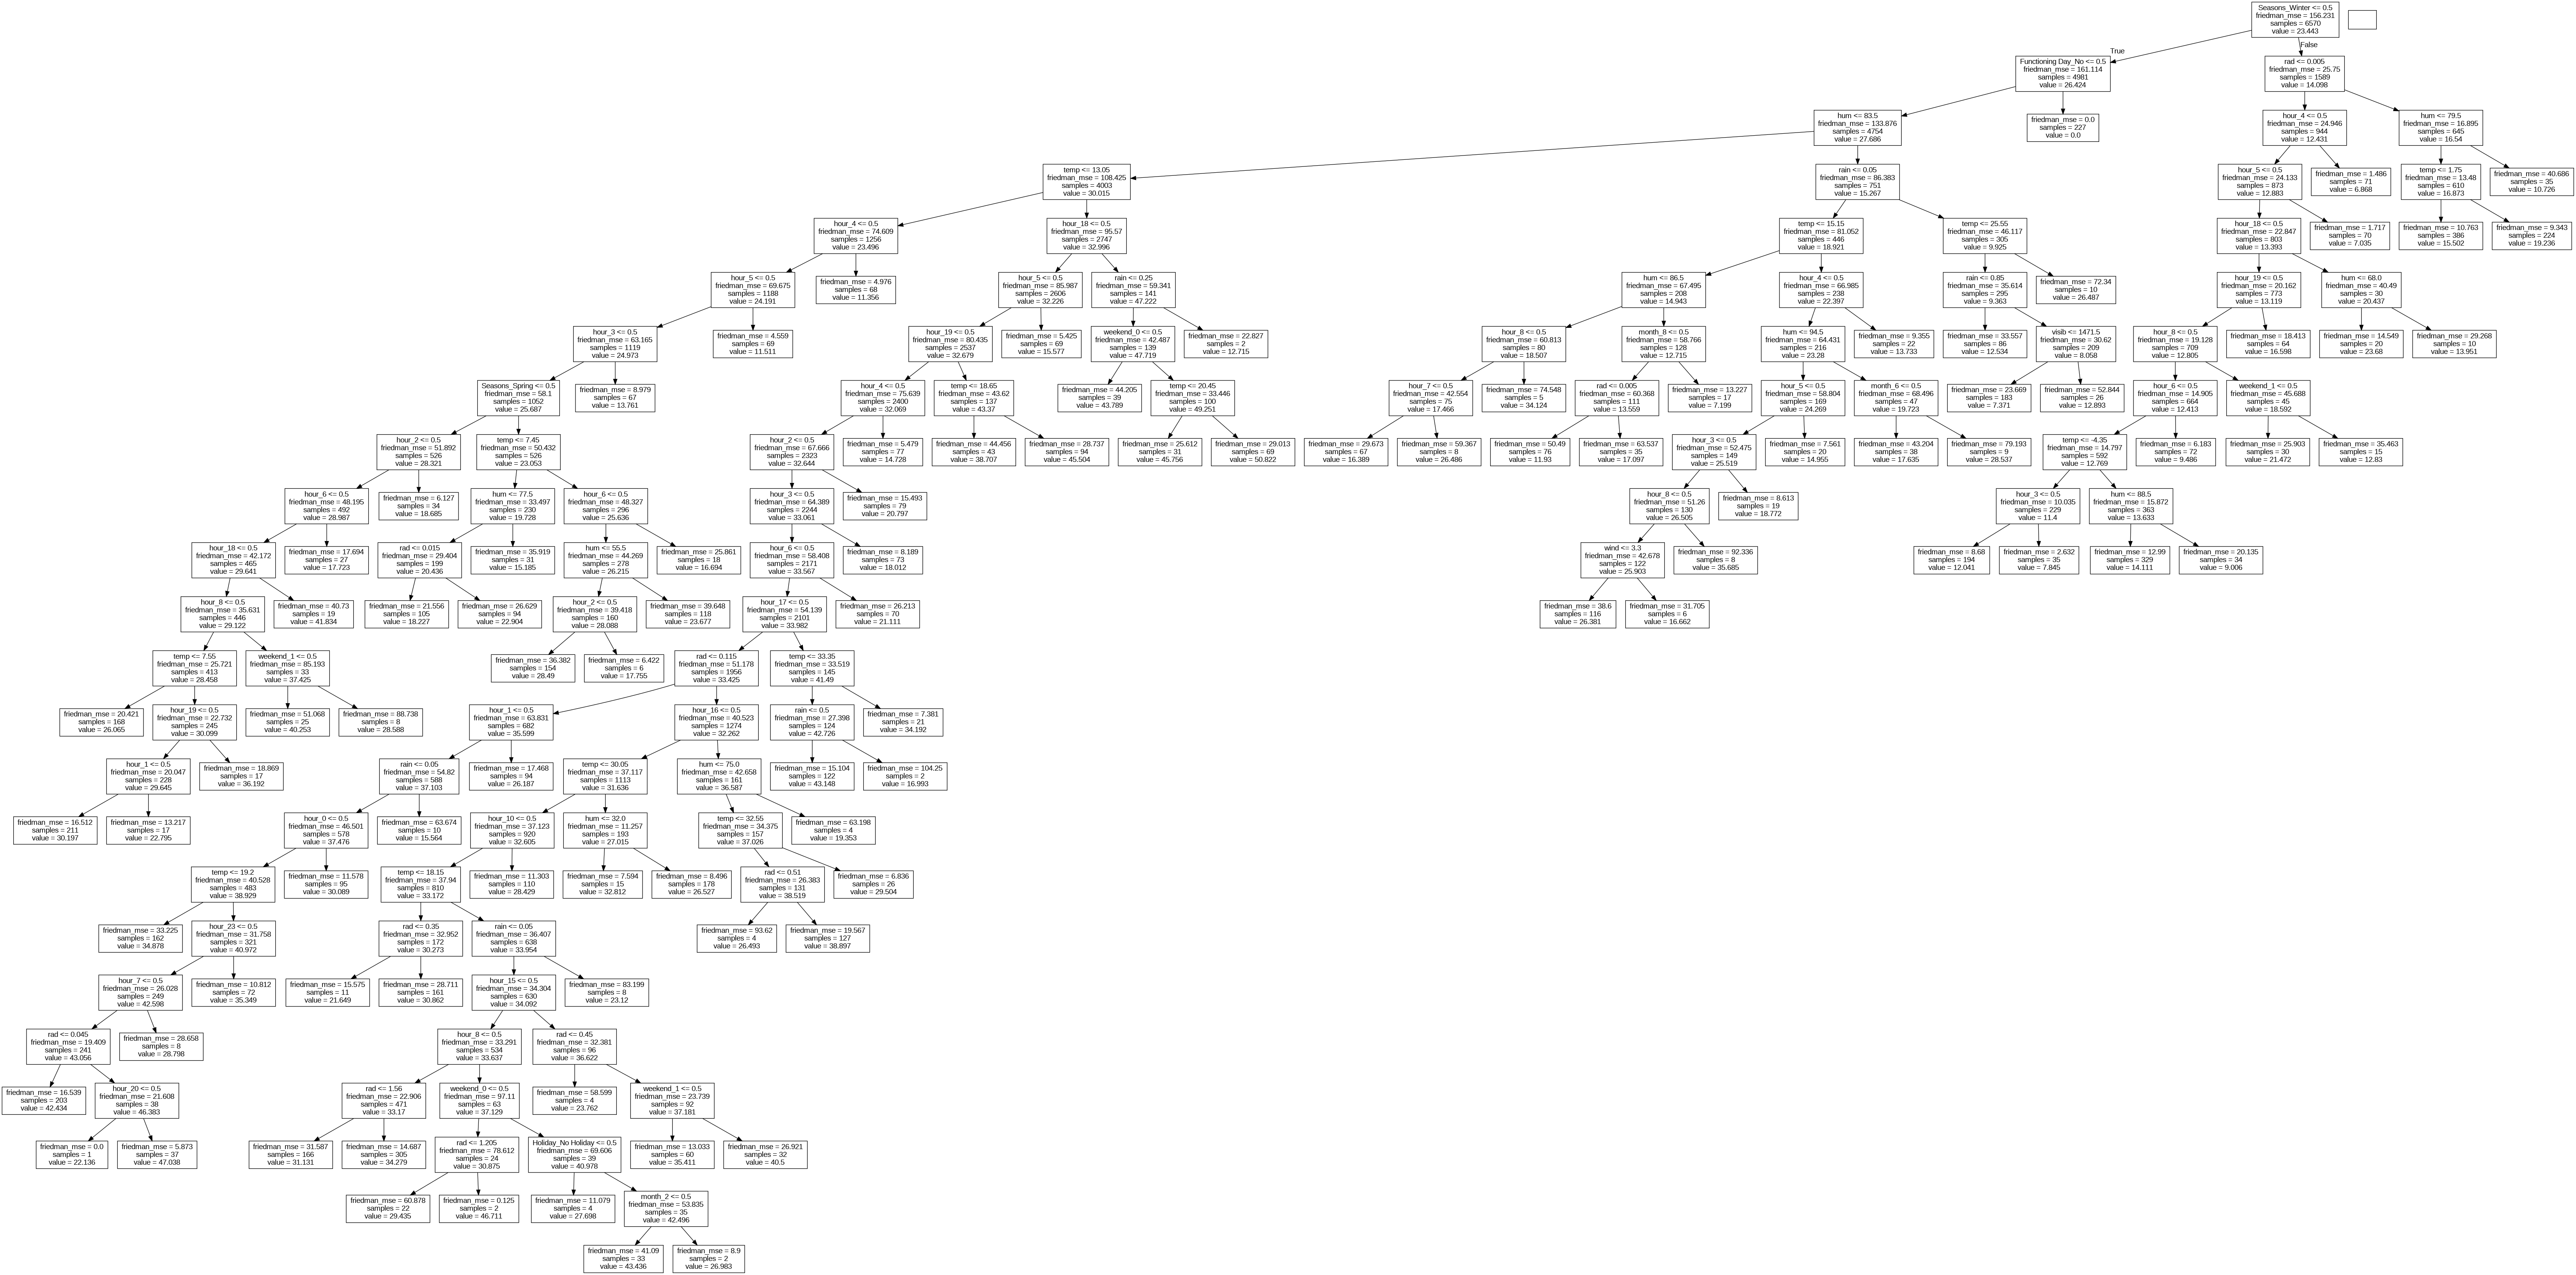

In [146]:
# Printing Decision Tree

import pydotplus                   # Pydotplus allows Python programmers to create, manipulate, and render graphs in various formats, including PDF, SVG, PNG.
from sklearn import tree
from IPython.display import Image  # Imports the Image class from the IPython.display module, which is used to display the decision tree image.

dot_data = tree.export_graphviz(x, feature_names = Xtrain.columns)      # Using export_graphviz() from tree libray to print tree and storing it in a variable.
a = pydotplus.graph_from_dot_data(dot_data)                             # Using another function from pydotplus library to store data and create a graph i.e. decision tree.
Image(a.create_png())                                                   # To pass output image

In [147]:
# Evaluation metrics for this updated model.

mse = mean_squared_error(ytest,rarg)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,rarg)
print('MAE         :',mae)

r2 = dtrr.best_score_
print('R2          :',r2)

adjr2 = 1-((1-r2)*(Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))
print('Adjusted R2 :',adjr2)

MSE         : 22.882749088723287
RMSE        : 4.783591651544191
MAE         : 3.3942106644386256
R2          : 0.8250042007573508
Adjusted R2 : 0.8206620765252064


* ***We got a r2 score of 82% for this model after hyperparameter tuning.***

In [148]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Decision Tree using RandomizedSearchCV',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [149]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model     MSE   RMSE    MAE    R2  \
0                          Linear Regression  39.062  6.250  4.645  0.74   
1                           Lasso Regression  87.009  9.328  7.090  0.43   
2        Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   
3                           Ridge Regression  40.079  6.331  4.757  0.74   
4  Ridge Regression using RandomizedSearchCV  39.029  6.247  4.673  0.75   
5                              Decision Tree  40.609  6.373  4.670  0.73   
6     Decision Tree using RandomizedSearchCV  22.883  4.784  3.394  0.83   

   Adjusted R2  
0         0.74  
1         0.41  
2         0.75  
3         0.73  
4         0.75  
5         0.73  
6         0.82

###**Random Forest**###

####**Fitting the model**

In [150]:
# Importing the algorithm and fitting variables in it.

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100,random_state = 42)     # n_estimators is used to assign the number of trees
rfr.fit(Xtrain,ytrain)

RandomForestRegressor(random_state=42)

In [151]:
# Checking the training and testing accuracies.

print('Training accuracy -',rfr.score(Xtrain,ytrain))
print('Testing accuracy  -',rfr.score(Xtest,ytest))

Training accuracy - 0.9867172715881205
Testing accuracy  - 0.9077704017309317


In [152]:
# Predicting the values for the testing set based on the ridge regression algo.

ypred = pd.DataFrame(rfr.predict(Xtest))
ypred

0
0     40.456714
1     27.132270
2     25.864521
3     48.388220
4     22.605164
...         ...
2185  14.372042
2186  45.679795
2187  40.856226
2188   4.577060
2189  21.131552

[2190 rows x 1 columns]

####**Evaluation metrics**

In [153]:
# Checking various evaluation metrics.

mse = mean_squared_error(ytest,ypred)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,ypred)
print('MAE         :',mae)

r2 = r2_score(ytest,ypred)
print('R2          :',r2)

adjr2 = (1-(1-r2_score(ytest, ypred))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))
print('Adjusted R2 :',adjr2)

MSE         : 13.958538336817194
RMSE        : 3.7361127307426356
MAE         : 2.4839185908211125
R2          : 0.9077704017309317
Adjusted R2 : 0.9054819332345551


* ***We got a r2 score of 90% for this model.***

In [154]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Random Forest',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [155]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model     MSE   RMSE    MAE    R2  \
0                          Linear Regression  39.062  6.250  4.645  0.74   
1                           Lasso Regression  87.009  9.328  7.090  0.43   
2        Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   
3                           Ridge Regression  40.079  6.331  4.757  0.74   
4  Ridge Regression using RandomizedSearchCV  39.029  6.247  4.673  0.75   
5                              Decision Tree  40.609  6.373  4.670  0.73   
6     Decision Tree using RandomizedSearchCV  22.883  4.784  3.394  0.83   
7                              Random Forest  13.959  3.736  2.484  0.91   

   Adjusted R2  
0         0.74  
1         0.41  
2         0.75  
3         0.73  
4         0.75  
5         0.73  
6         0.82  
7         0.91

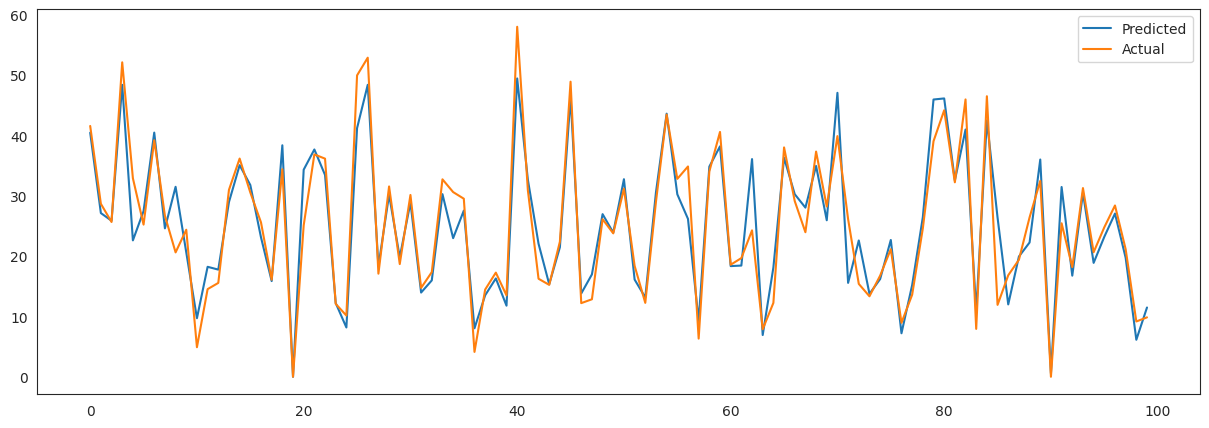

In [156]:
# Comparison between actual and predicted values of the target variable.

plt.figure(figsize=(15,5))
plt.plot((ypred)[:100])
plt.plot((np.array(ytest)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

* ***In the above plot we can see the performance of this model on our dataset by comparing the trend lines for both actual and predicted values.***

####**Cross-Validation & Hyperparameter Tuning**

#####**Random Forest using RandomizedSearchCV**

In [157]:
# Importing RandomizedSearchCV and fitting the training set for hyperparameter tuning and cross validation.

from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators' : [5, 10, 15, 20, 30],'max_depth' : [3, 5, 10, 15, 20], 'max_features' : ['auto','sqrt','log2'],}
dtrr = RandomizedSearchCV(rfr,param_grid,scoring='r2',cv=10)
dtrr.fit(Xtrain,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [3, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [5, 10, 15, 20, 30]},
                   scoring='r2')

In [158]:
# Testing updated random forest model on testing set.

rarg = pd.DataFrame(dtrr.predict(Xtest))
rarg

0
0     32.485506
1     27.465431
2     27.465431
3     49.129779
4     24.053197
...         ...
2185  16.114654
2186  44.298083
2187  34.494607
2188   8.431540
2189  19.894412

[2190 rows x 1 columns]

In [159]:
# Calculating best parameters for our model by hyperparamter tuning.

print('Best parameter -',dtrr.best_params_)
print('Best score     -',dtrr.best_score_)
print('Best estimator -',dtrr.best_estimator_)

Best parameter - {'n_estimators': 5, 'max_features': 'auto', 'max_depth': 15}
Best score     - 0.8585759943856136
Best estimator - RandomForestRegressor(max_depth=15, max_features='auto', n_estimators=5,
                      random_state=42)


In [160]:
# Evaluation metrics for this updated model.

mse = mean_squared_error(ytest,rarg)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,rarg)
print('MAE         :',mae)

r2 = dtrr.best_score_
print('R2          :',r2)

adjr2 = 1-((1-r2)*(Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))
print('Adjusted R2 :',adjr2)

MSE         : 20.340831957849442
RMSE        : 4.5100811475903
MAE         : 3.175509195487163
R2          : 0.8585759943856136
Adjusted R2 : 0.8550668781414364


* ***We got a r2 score of 86% for this model after hyperparameter tuning.***

In [161]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Random Forest using RandomizedSearchCV',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [162]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model     MSE   RMSE    MAE    R2  \
0                          Linear Regression  39.062  6.250  4.645  0.74   
1                           Lasso Regression  87.009  9.328  7.090  0.43   
2        Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   
3                           Ridge Regression  40.079  6.331  4.757  0.74   
4  Ridge Regression using RandomizedSearchCV  39.029  6.247  4.673  0.75   
5                              Decision Tree  40.609  6.373  4.670  0.73   
6     Decision Tree using RandomizedSearchCV  22.883  4.784  3.394  0.83   
7                              Random Forest  13.959  3.736  2.484  0.91   
8     Random Forest using RandomizedSearchCV  20.341  4.510  3.176  0.86   

   Adjusted R2  
0         0.74  
1         0.41  
2         0.75  
3         0.73  
4         0.75  
5         0.73  
6         0.82  
7         0.91  
8         0.86

###**Gradient Boosting**###

####**Fitting the model**

In [163]:
# Importing the algorithm and fitting variables in it.

from sklearn.ensemble import GradientBoostingRegressor

params = {
    'n_estimators': 90,     # Increase the number of estimators.
    'max_depth': 12,          # Limit the depth of each tree
    'min_samples_split': 50,  # Set the minimum samples required to split
    'min_samples_leaf': 50   # Set the minimum samples required at a leaf node
}

gbr = GradientBoostingRegressor(**params)
gbr.fit(Xtrain,ytrain)
print('Testing accuracy  -',gbr.score(Xtest,ytest))

Testing accuracy  - 0.9158848870214714


In [164]:
# Checking the training and testing accuracies.

print('Training accuracy -',gbr.score(Xtrain,ytrain))
print('Testing accuracy  -',gbr.score(Xtest,ytest))

Training accuracy - 0.945353058928438
Testing accuracy  - 0.9158848870214714


In [165]:
# Predicting the values for the testing set based on the ridge regression algo.

ypred = pd.DataFrame(gbr.predict(Xtest))
ypred

0
0     41.844165
1     26.836837
2     24.415900
3     47.907748
4     27.049765
...         ...
2185  14.505109
2186  44.405130
2187  37.216201
2188   4.395595
2189  19.484439

[2190 rows x 1 columns]

####**Evaluation metrics**

In [166]:
# Checking various evaluation metrics.

mse = mean_squared_error(ytest,ypred)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,ypred)
print('MAE         :',mae)

r2 = r2_score(ytest,ypred)
print('R2          :',r2)

adjr2 = (1-(1-r2_score(ytest, ypred))*((Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1)))
print('Adjusted R2 :',adjr2)

MSE         : 12.730447180211511
RMSE        : 3.567975221356156
MAE         : 2.45420068355979
R2          : 0.9158848870214714
Adjusted R2 : 0.9137977610908244


* ***We got a r2 score of 91% for this model.***

In [167]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Gradient Boosting',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [168]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model     MSE   RMSE    MAE    R2  \
0                          Linear Regression  39.062  6.250  4.645  0.74   
1                           Lasso Regression  87.009  9.328  7.090  0.43   
2        Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   
3                           Ridge Regression  40.079  6.331  4.757  0.74   
4  Ridge Regression using RandomizedSearchCV  39.029  6.247  4.673  0.75   
5                              Decision Tree  40.609  6.373  4.670  0.73   
6     Decision Tree using RandomizedSearchCV  22.883  4.784  3.394  0.83   
7                              Random Forest  13.959  3.736  2.484  0.91   
8     Random Forest using RandomizedSearchCV  20.341  4.510  3.176  0.86   
9                          Gradient Boosting  12.730  3.568  2.454  0.92   

   Adjusted R2  
0         0.74  
1         0.41  
2         0.75  
3         0.73  
4         0.75  
5         0.73  
6         0.82  
7         0.91  
8         0.86  
9         0.91

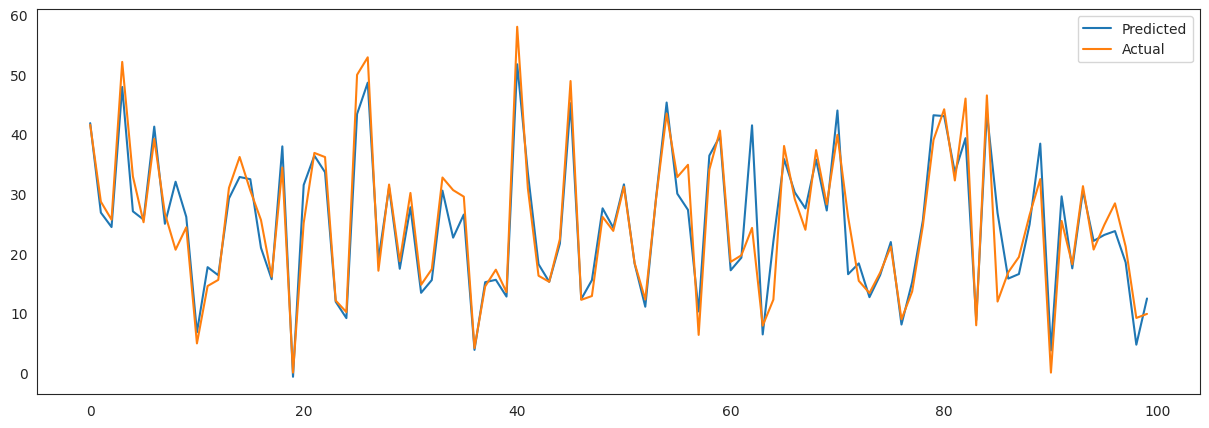

In [169]:
# Comparison between actual and predicted values of the target variable.

plt.figure(figsize=(15,5))
plt.plot((ypred)[:100])
plt.plot((np.array(ytest)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

* ***In the above plot we can see the performance of this model on our dataset by comparing the trend lines for both actual and predicted values.***

####**Cross-Validation & Hyperparameter Tuning**

#####**Gradient Boosting using RandomizedSearchCV**

In [170]:
# Importing RandomizedSearchCV and fitting the training set for hyperparameter tuning and cross validation.

from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators' : [10,20,30,40],
              'learning_rate': np.arange(0.1, 1.1, 0.1),
              'max_depth' : [4,6,8],
              'min_samples_leaf': [40,50],
              'min_samples_split': [100,150]
              }

dtrr = RandomizedSearchCV(gbr,param_grid,scoring='r2',cv=5)
dtrr.fit(Xtrain,ytrain)

RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingRegressor(max_depth=12,
                                                       min_samples_leaf=50,
                                                       min_samples_split=50,
                                                       n_estimators=90),
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [100, 150],
                                        'n_estimators': [10, 20, 30, 40]},
                   scoring='r2')

In [171]:
# Testing updated gradient boosting model on testing set.

rarg = pd.DataFrame(dtrr.predict(Xtest))
rarg

0
0     40.381918
1     27.853336
2     26.229932
3     46.097524
4     25.906672
...         ...
2185  15.393970
2186  45.161284
2187  36.407144
2188   5.131997
2189  18.775295

[2190 rows x 1 columns]

In [172]:
# Calculating best parameters for our model by hyperparamter tuning.

print('Best parameter -',dtrr.best_params_)
print('Best score     -',dtrr.best_score_)
print('Best estimator -',dtrr.best_estimator_)

Best parameter - {'n_estimators': 40, 'min_samples_split': 100, 'min_samples_leaf': 50, 'max_depth': 8, 'learning_rate': 0.2}
Best score     - 0.8939380249906856
Best estimator - GradientBoostingRegressor(learning_rate=0.2, max_depth=8, min_samples_leaf=50,
                          min_samples_split=100, n_estimators=40)


In [173]:
# Evaluation metrics for this updated model.

mse = mean_squared_error(ytest,rarg)
print('MSE         :',mse)

rmse = np.sqrt(mse)
print('RMSE        :',rmse)

mae = mean_absolute_error(ytest,rarg)
print('MAE         :',mae)

r2 = dtrr.best_score_
print('R2          :',r2)

adjr2 = 1-((1-r2)*(Xtest.shape[0]-1)/(Xtest.shape[0]-Xtest.shape[1]-1))
print('Adjusted R2 :',adjr2)

MSE         : 14.544895824284412
RMSE        : 3.8137771073155826
MAE         : 2.6796783088106078
R2          : 0.8939380249906856
Adjusted R2 : 0.8913063374085257


* ***We got a r2 score of 87% for this model after hyperparameter tuning.***

In [174]:
# Storing these metrics in a dictionary.

dict1 = {'Model'      : 'Gradient Boosting using RandomizedSearchCV',
         'MSE'        : round((mse),3),
         'RMSE'       : round((rmse),3),
         'MAE'        : round((mae),3),
         'R2'         : round((r2),2),
         'Adjusted R2': round((adjr2),2)}

In [175]:
# Adding evaluation metrics for this model to our comparison dataframe.

cdf = cdf.append(dict1,ignore_index=True)
cdf

Model     MSE   RMSE    MAE    R2  \
0                            Linear Regression  39.062  6.250  4.645  0.74   
1                             Lasso Regression  87.009  9.328  7.090  0.43   
2          Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   
3                             Ridge Regression  40.079  6.331  4.757  0.74   
4    Ridge Regression using RandomizedSearchCV  39.029  6.247  4.673  0.75   
5                                Decision Tree  40.609  6.373  4.670  0.73   
6       Decision Tree using RandomizedSearchCV  22.883  4.784  3.394  0.83   
7                                Random Forest  13.959  3.736  2.484  0.91   
8       Random Forest using RandomizedSearchCV  20.341  4.510  3.176  0.86   
9                            Gradient Boosting  12.730  3.568  2.454  0.92   
10  Gradient Boosting using RandomizedSearchCV  14.545  3.814  2.680  0.89   

    Adjusted R2  
0          0.74  
1          0.41  
2          0.75  
3          0.73  
4          0.75  
5          0.73  
6          0.82  
7          0.91  
8          0.86  
9          0.91  
10         0.89

###**Model Explainibility**

**What is model explainibility ?**

* ***We can define model explainibility as the process in which most important features that contributed in the prediction of an output are depicted as a result.***

* ***There are various models which are used for the process of model explainibility in this project we are using SHAP ( SHapely Additive exPlanations) to explain features.***

####**Feature importance for Gradient Boosting**

In [176]:
# Importing shap library to explain feature importance.

import shap

In [177]:
# Creating an explainer object for Gradient boosting model.

explainer = shap.TreeExplainer(gbr)


In [178]:
# Using explainer object to calculate shap values for our model.

shap_values = explainer.shap_values(Xtest)

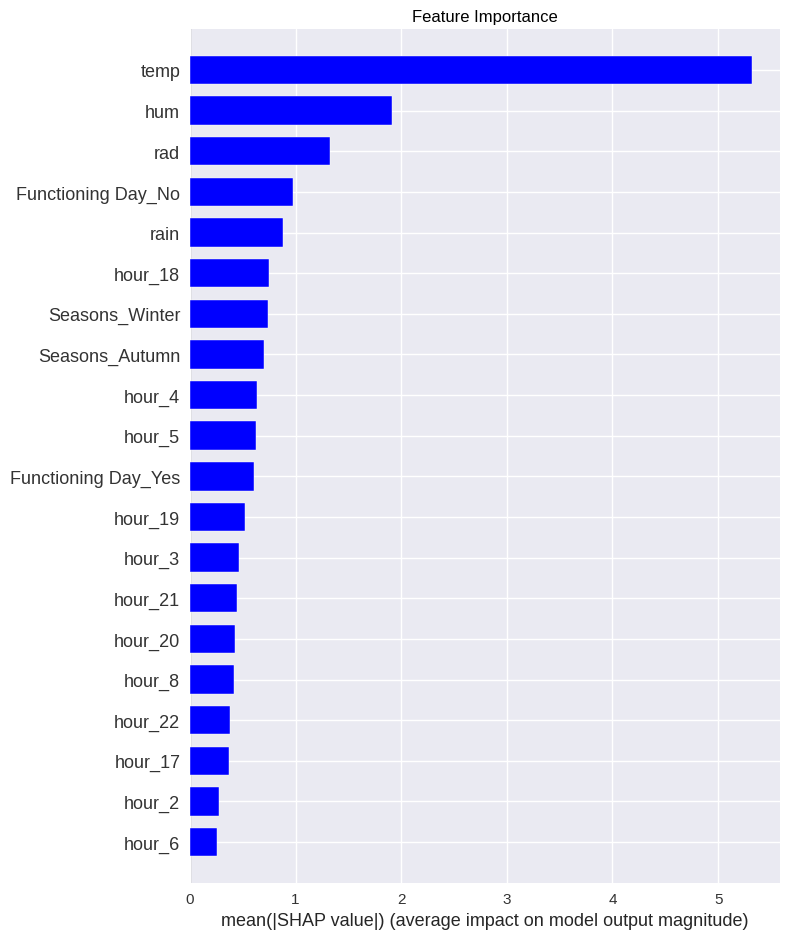

In [179]:
# Plotting our shap values.

plt.style.use('seaborn')
plt.title('Feature Importance',color = 'black')
shap.summary_plot(shap_values, Xtest, plot_type ='bar',color = 'blue')

* ***As we can conclude by the above graph that 'Temperature', 'Humidity' and 'Radiation' were the top features that contributed the most in predicting the output in 'Gradient Boosting' model which has the highest r2 score of 92%.***

#**Conclusion**

During our analysis, we first performed EDA on all of the attributes of our dataset. We began by analysing and then transforming our dependent variable, "Rental Bike Count." Following that, we looked at categorical variables and excluded those with a majority in one class. We also examined numerical variables to determine how they correlated, were distributed, and were connected to the dependent variable. We also deleted several numerical variables with largely 0 values and hot-encoded the category variables.

We then utilised six machine learning algorithms: linear regression, lasso, ridge, decision tree, random forest, and gradient boosting. We used hypertuning to increase the performance of our model and put the results in a data frame so we could compare them later. Here are our findings:

In [180]:
# Displaying evaluation metrics of all the models for comparison.

cdf

Model     MSE   RMSE    MAE    R2  \
0                            Linear Regression  39.062  6.250  4.645  0.74   
1                             Lasso Regression  87.009  9.328  7.090  0.43   
2          Lasso Regression using GridSearchCV  39.062  6.250  4.645  0.76   
3                             Ridge Regression  40.079  6.331  4.757  0.74   
4    Ridge Regression using RandomizedSearchCV  39.029  6.247  4.673  0.75   
5                                Decision Tree  40.609  6.373  4.670  0.73   
6       Decision Tree using RandomizedSearchCV  22.883  4.784  3.394  0.83   
7                                Random Forest  13.959  3.736  2.484  0.91   
8       Random Forest using RandomizedSearchCV  20.341  4.510  3.176  0.86   
9                            Gradient Boosting  12.730  3.568  2.454  0.92   
10  Gradient Boosting using RandomizedSearchCV  14.545  3.814  2.680  0.89   

    Adjusted R2  
0          0.74  
1          0.41  
2          0.75  
3          0.73  
4          0.75  
5          0.73  
6          0.82  
7          0.91  
8          0.86  
9          0.91  
10         0.89


*   **There is no evidence of overfitting.**


*   **Random Forest Regressor and Gradient Boosting Regressor had the highest R2 values for the testing set, with 91% and 92%, respectively.**


*   **We can deploy this model.**

But this is not the end of the story. Because this information is temporal, the values for variables such as temperature, wind speed, sun radiation, and so on may not always be consistent. As a result, there will be times when the model does not operate well. Because machine learning is a continually changing field, we must be ready for everything and regularly test our model. As a consequence, knowing and staying upto date with the ever-changing ML field will surely help one stay one step ahead in the future.